# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 2. Методы нахождения оценок. Бутстреп. Байесовская статистика
### Мягкий дедлайн --- 28 октября 23:59 (по справке был перенесён до 04.11 23:59)
### Жёсткий дедлайн --- 2 ноября 16:59

Выполняйте задания прямо в ноутбуке. Пожалуйста, не стирайте условия задач.

- Информация о выполнении и курсе в целом есть в чате https://t.me/+IHdLycZDD5g5MDQy.
- По вопросам об условиях задач, требованиям можно писать в чат или https://t.me/vitalii_kondratiuk .
- По организационным вопросам https://t.me/d_pavlov_p

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* собственно кодом,
* Перед ячейками с кодом в случае необходимости пишите, что Вы вычисляете, что ожидаете увидеть и как будете анализировать результат
* После каждого числа или графика пишите анализ: каков результат? Оправдал ли он ожидания? Какие особености Вы увидели? Откуда они взялись?
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Для красоты графиков можно (и приветствуется) вместо гистограммы использовать ядерную оценку плотности (kernel density estimator): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

Загрузим необходимый для задачи 2 датасет. Если что-то пошло не так, то просто скачайте файл по ссылке вручную.

In [2540]:
!pip3 install -q gdown
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

zsh:1: no matches found: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs


In [2541]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['text.usetex'] = True
sns.set(style="darkgrid", font_scale=1.4)
pd.options.mode.copy_on_write = True

**Условие задания**: Великая Ордалия уже почти готова к путешествию, однако враги империи проникли в замок и уничтожили все формулы с оценками из Домашнего задания 1. Можно попытаться восстановить их по памяти, но не лучше ли взамен старых оценок изобрести новые? Помимо этого за две тысячи лет (прошедших с момента первой ордалии до наших дней) точечные оценки значительно устарели и уже не способны отражать реальную суть вещей, поэтому Вам будет предложено попробовать на практике два других подхода: интервальные оценки и байесовские оценки.

В этой практике Вам предложено реализовать несколько подходов к построению оценок и понять, когда какой подход применять.

**Дисклеймер**:
В задачах будет разбиение на пункты, но оцениваться задача будет **целиком**. Можете считать, что выполнение всех пунктов вместе с отсутствием замечаний по полноте анализа/эффективности кода/информативности графиков/т.д. приносит полный балл.

### Задача 1

Прочитайте ещё раз задачу 1 домашки 1. Вы сравнивали оценки исходя из визуальных свойств их графиков. Пришло время начать сравнивать оценки строго!

Напомним, что в задаче речь шла про оценки параметра $\theta$ распределения $U[0, \theta]$: $2\overline{X}$, $\frac{n+1}{n} X_{(n)}$, $(n+1)X_{(1)}$, $\overline{X} + X_{(n)}/ 2$ и $X_{(1)}+X_{(n)}$. Как и ранее, зафиксируем какое-то конкретное значение параметра, скажем, $\theta = 1$.

Постройте плотности для первых трёх оценок. Настойчиво просим предоставлять решение в виде теха, но если у вас лапки, то можете прикрепить фото с хорошо разборчивым почерком.

Решение и ответ: для первой оценки решение в аналитическом виде не представляется. Для остальных найдём сначала функции распределения: $$F_{X_{(n)}}(t) = t^n \cdot I(t\in[0, 1]) + I(t > 1) \Rightarrow F_{\frac{n + 1}{n}X_{(n)}}(t) = F_{X_{(n)}}\left(\frac{tn}{n + 1}\right) = \left(\frac{tn}{n + 1}\right)^n \cdot I(t\in[0, 1 + 1/n]) + I(t > 1 + 1/n),$$
$$F_{X_{(1)}}(t) = (1 - (1 - t)^n)\cdot I(t\in[0, 1]) + I(t > 1) \Rightarrow F_{(n + 1)X_{(1)}}(t) = F_{X_{(1)}}\left(\frac{t}{n + 1}\right) = \left(1 - \left(1 - \frac{t}{n + 1}\right)^n \right)\cdot I(t\in[0, n + 1]) + I(t > n + 1).$$
И сами плотности:
$$p_{\frac{n + 1}{n}X_{(n)}}(t) = \frac{n^2}{n + 1}\left(\frac{tn}{n + 1}\right)^{n - 1}\cdot I(t\in[0, 1 + 1/n])$$
$$p_{(n + 1)X_{(1)}}(t) = \frac{n}{n + 1}\left(1 - \left(\frac{t}{n + 1}\right)^{n - 1}\right)\cdot I(t\in[0, n + 1]$$

Для квадратичной функции потерь посчитайте аналитически (для первых трёх оценок) и численно (для каждой оценки) риск для выборки из $N$ элементов. Начните с $N=1000$ и уменьшите его, если вычисления будут неподъемными. Для численного вычисления интеграла можно использовать scipy.integrate.quad или метод Монте-Карло.

In [162]:
N = 1000
theta = 1
X = sps.uniform.rvs(scale=theta, size=N)
bootstrap_1 = np.random.randint(0, N, (N, N))
bootstrap_2 = np.random.randint(0, N, (N, N))
bootstrap_3 = np.random.randint(0, N, (N, N))

In [164]:
est = np.zeros((3, N))
est[0] = 2*X[bootstrap_1].mean(-1)
est[1] = (X[bootstrap_2].max(-1))*(N + 1)/N
est[2] = (X[bootstrap_3].min(-1))*(N + 1)

In [166]:
est_sorted = np.sort(est)
print('First estimator confindence interval: (%.5f, %.5f)' % (est_sorted[0][int(N*0.025)], est_sorted[0][int(N*0.975)]))
print('Second estimator confindence interval: (%.5f, %.5f)' % (est_sorted[1][int(N*0.025)], est_sorted[1][int(N*0.975)]))
print('Third estimator confindence interval: (%.5f, %.5f) ???' % (est_sorted[2][int(N*0.025)], est_sorted[2][int(N*0.975)]))

First estimator confindence interval: (0.94398, 1.01607)
Second estimator confindence interval: (0.99918, 1.00074)
Third estimator confindence interval: (1.44217, 3.27162) ???


In [168]:
squared_error_risk = ((est - theta)**2).mean(-1)
print('First estimator squared error risk: %.7f' % (squared_error_risk[0], ))
print('Second estimator squared error risk: %.7f' % (squared_error_risk[1], ))
print('Third estimator squared error risk: %.7f' % (squared_error_risk[2], ))

First estimator squared error risk: 0.0007069
Second estimator squared error risk: 0.0000005
Third estimator squared error risk: 0.6673091


Постройте распределения оценок для одного $\theta$ на одном графике

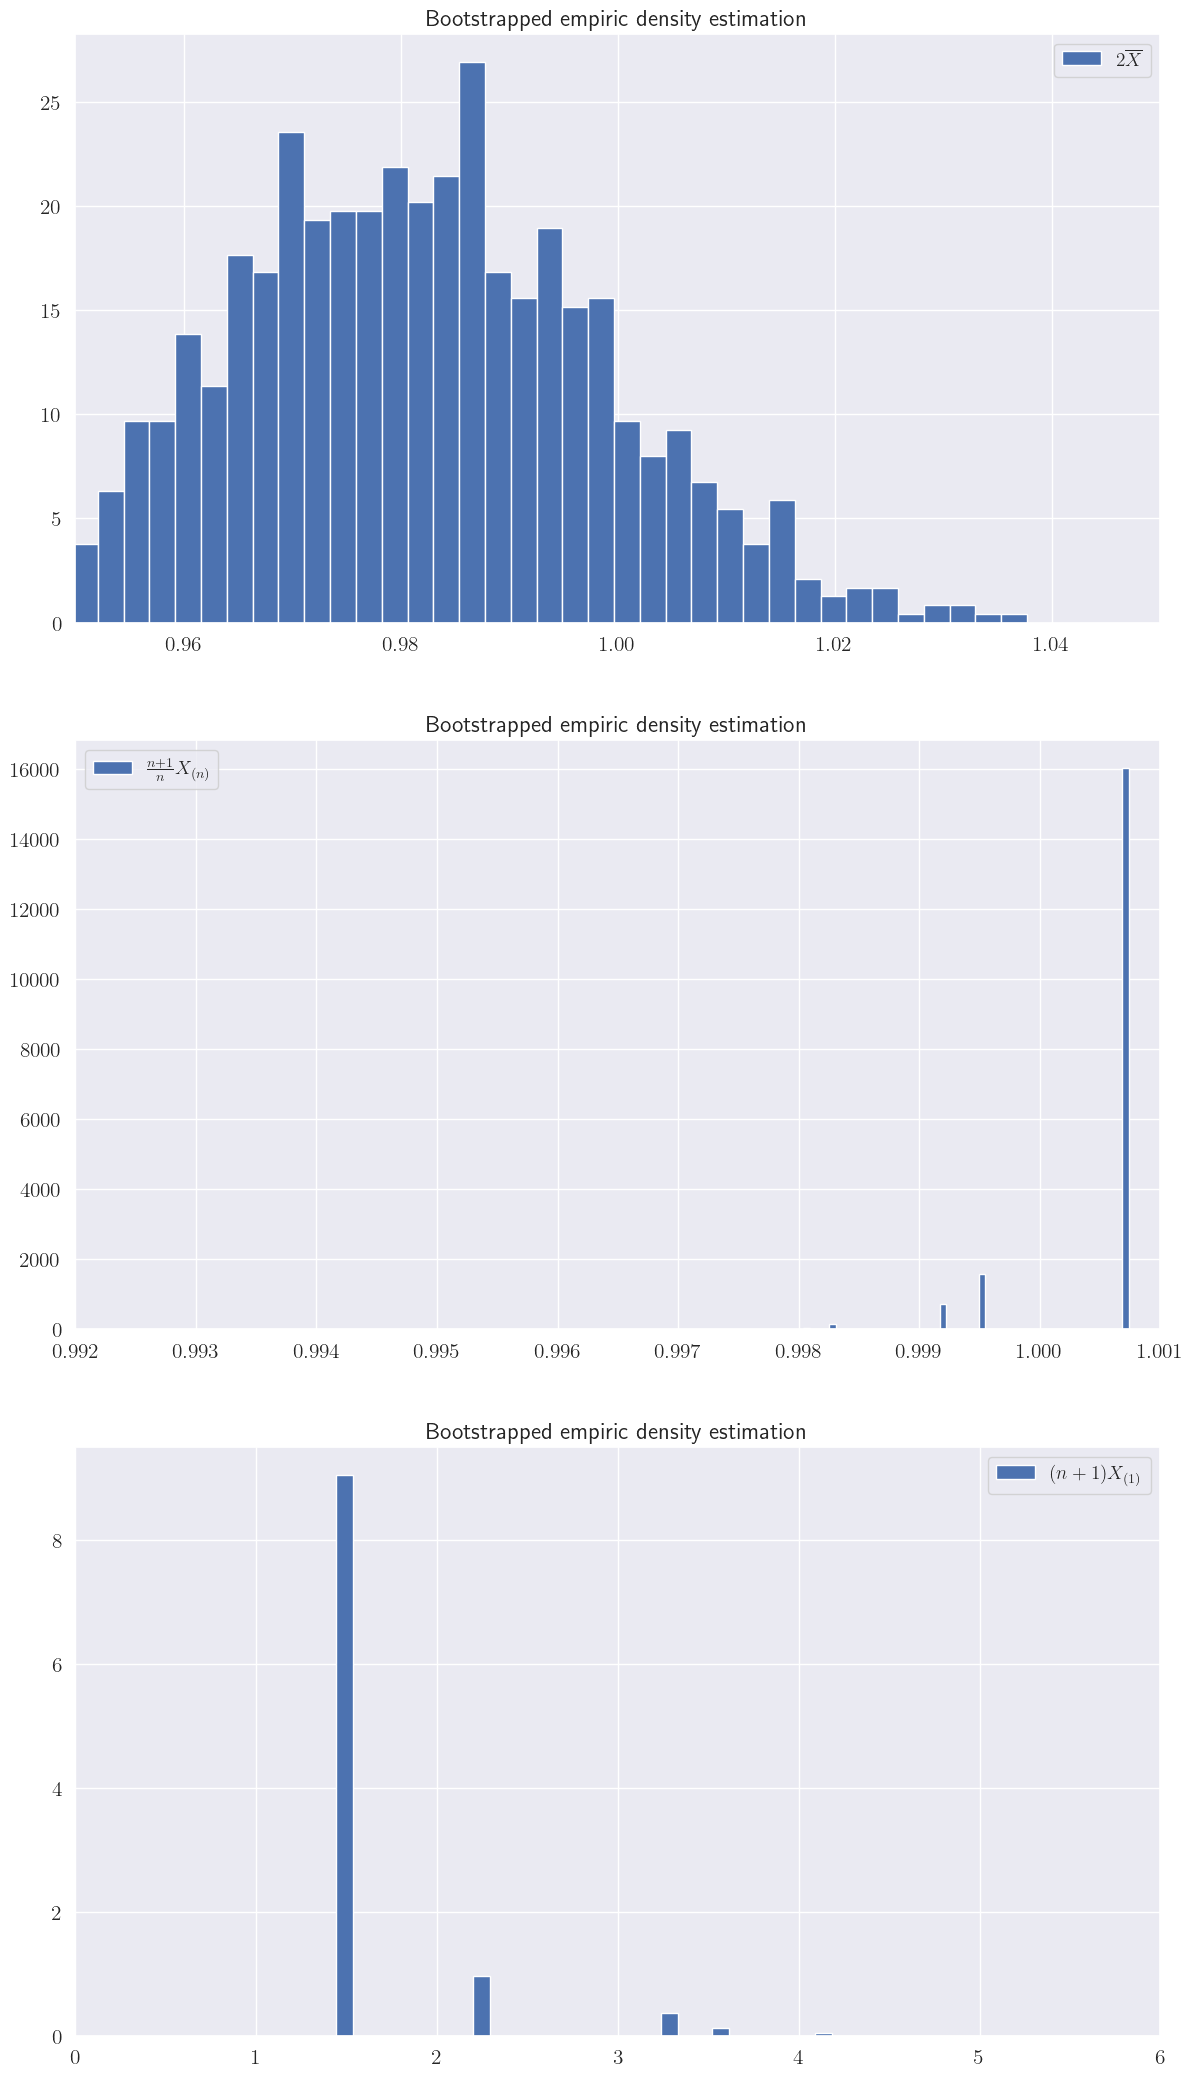

In [176]:
fig, axs = plt.subplots(3, figsize=(14, 26))
#plt.title('Estimators empiric densities', fontsize=18)
est_labels = np.array([r'$2\overline{X}$', r'$\frac{n + 1}{n}X_{(n)}$', r'$(n + 1)X_{(1)}$'])

x_limits = ((0.95, 1.05), (0.992, 1.001), (0, 6))

for idx, ax in np.ndenumerate(axs):
    ax.hist(est[idx], density=True, bins=50, label=est_labels[idx])
    ax.legend(fontsize=14)
    ax.set_title('Bootstrapped empiric density estimation')
    ax.set_xlim(x_limits[idx[0]])
plt.show()

Вспомните свой вывод из задачи 1. Согласуется ли выбор "лучшей" оценки с понятием квадратичного риска? Почему?

Ответ: согласуется. Согласно расчитанным по методу Монте-Карло риску для каждой из оценок в квадратично подходе, приходим вновь к следующей градации оценок по их качеству: $$R\left(\frac{N + 1}{N}X_{(N)}, \theta\right) < R\left(2\overline{X}, \theta\right) < R\left((N + 1)X_{(1)}, \theta\right) \Rightarrow (N + 1)X_{(1)} \prec 2\overline{X} \prec \frac{n + 1}{n}X_{(n)}.$$
Согласованность с предыдущими результатами объясняется тем, что в обоих случаях мы фактически считаем дисперсию нашей оценки; до этого мы её считали непосредственно через выборку выборок и получаемую таким образом выборку оценок, а сейчас мы эту же дисперсию посчитали бутстрапированием, то есть фактически посчитали дисперсию нашей оценки для выборки подчиняющейся эмпирическому распределению $\hat{\mathbb{P}}_\theta$

Вспомните и напишите формулировку теоремы Рао-Крамера. Посчитайте, какую нижнюю оценку риска предлагает эта теорема. Сравните её численное значение с посчитанным Вами риском. Сделайте выводы.

Ответ: если имеется $X$ - выборка размера $n$ и $f(\theta, X)$ -  её функция правдоподобия, то при выполнении условий ренулярности:
* $\Theta \subset \mathbb{R}$ - открытый интервал;
* $A = \{x : p_\theta(x) > 0\}$ (носитель плотности распределения) не зависит от $\theta$;
* функция вклада выборки $u_\theta(X) = \frac{\partial}{\partial \theta}\ln f_X(\theta)$ имеет конечную дисперсию $I_X(\theta) = \mathbb{E}_\theta(u_\theta(X))^2$ для всех $\theta \in \Theta$, (информация Фишера);
* для любой оценки $\hat{\theta}(X)$ с равномерно ограниченным вторым моментом ($\mathbb{E}_\theta\hat{\theta}(X)^2 < M < +\infty \; \forall \theta\in\Theta$) имеет равенство $\frac{\partial}{\partial \theta}\int_{\mathscr{X}} \hat{\theta}(X)f_\theta(X)\, d\mu(X) = \int_{\mathscr{X}} \hat{\theta}(X)\frac{\partial}{\partial \theta}f_\theta(X) \, d\mu(X)$;

то для любой несмещённость статистики $\hat{\theta}(X)$ параметра $\tau(\theta)$ выполняется неравенство $$R(\hat{\theta}, \tau(\theta)) = \mathbb{D}_\theta \hat{\theta} \ge \frac{(\tau'(\theta))^2}{I_X({\theta})},$$ причем равенство достигается (в этом случае оценка называется эффективной) тогда и только тогда, когда $\hat{\theta} - \tau(\theta) = c(\theta)u_\theta(X)$, причем $c(\theta) = \frac{\tau(\theta)'}{I_X({\theta})}$.

В нашем случае, однако, так просто эффективную оценку не посчитать, посколько наша выборка $X$ подчиняется распределению $U[0, \theta]$, которое не удовлетворяет условиям регулярности (носитель плотности распределения разный для разных $\theta$). Посчитаем в таком случае оптимальную оценку. Функция правдободобия будет равна $\frac{1}{\theta^n}I(X_{(n)} < \theta)$, поэтому по критерию факторизации $X_{(n)}$ - достаточная статистика, $\mathbb{E}_{\theta}X_{(n)} = \frac{n\theta}{n + 1}$. Из свойств интеграла Римана доказывалось, что эта оценка - полная, значит, решая уравнение несмещенности $\mathbb{E}_\theta\varphi(X_{(n)}) = \theta$, получаем, что $\frac{n + 1}{n}X_{(n)}$ - оптимальная оценка для распределения $U[0, \theta]$, а значит для любой несмещённой оценки $\hat{\theta}(X)$ параметра $\theta$ выполняется $$R\left(\frac{n + 1}{n}X_{(n)}\right) \le R(\hat{\theta}(X), \theta).$$ Причем $$R\left(\frac{n + 1}{n}X_{(n)}\right) = \mathbb{D}_\theta\left(\frac{n + 1}{n}X_{(n)}\right) = \frac{\theta^2}{n(n + 2)}$$ и, подставляя исходные значения $\theta$ и $n$, получаем нижнюю оценку для риска.

In [183]:
print('Lower risk bound: %.6f' % (theta**2/(N*(N + 2)), ))

Lower risk bound: 0.000001


Как видим, полученное значение действительно меньше всех полученных ранее значений эмпирического риска для разных оценок, а также видим, что численно посчитанный риск для оптимальной оценки $\frac{n + 1}{n}X_{(n)}$ достаточно близок к его теоретическому значению, что говорит о хорошей точности совместного применения методов Монте-Карло и бутстрапирования.

Численно посчитайте риск для функции потерь $l(x, y) = |x - y|$ и для какой-то другой осмысленной предложенной Вами функцией потерь. Будет ли порядок качества на оценках таким же, как и для квадратичного подхода?

In [187]:
absolute_error_risk = (abs(est - theta)).mean(-1)
print('First estimator absolute error risk: %.7f' % (absolute_error_risk[0], ))
print('Second estimator absolute error risk: %.7f' % (absolute_error_risk[1], ))
print('Third estimator absolute error risk: %.7f' % (absolute_error_risk[2], ))

First estimator absolute error risk: 0.0221323
Second estimator absolute error risk: 0.0007230
Third estimator absolute error risk: 0.6363945


Возьмем в качестве третьей функции потерь функцию $d(x, y) = |e^x - e^y|$.

In [190]:
special_error_risk = (abs(np.exp(est) - np.exp(theta))).mean(-1)
print('First estimator special error risk: %.7f' % (special_error_risk[0], ))
print('Second estimator special error risk: %.7f' % (special_error_risk[1], ))
print('Third estimator special error risk: %.7f' % (special_error_risk[2], ))

First estimator special error risk: 0.0592739
Second estimator special error risk: 0.0019658
Third estimator special error risk: 4.3412705


Видим, что порядок качества оценок меняться не будет при замене квадратиченой функции потерь на любую другую функцию, отдалённо напоминающую метрику. 

Вернёмся ко квадратичной функции потерь. Пусть теперь сам параметр $\theta$ приходит из распределения $\mathsf Q$ с плотностью $q(x) = 2xI[0, 1]$. Посчитайте численно байесовский риск каждой оценки. Сравните оценки в байесовском подходе. Остался ли порядок прежним?

Поскольку $$\int_{\Theta}\mathbb{E}_tg(\hat{\theta}(X), t)q(t)\,dt = \int_{\Theta \times \mathbb{R}^N}g(\hat{\theta}(X), t)p(X|t)q(t)\,dXdt = \int_{\Theta \times \mathbb{R}^N}g(\hat{\theta}(X), t)p(X, t)\,dXdt$$ мы можем считать этот интеграл как среднее значение статистика $g(\hat{\theta}(X), t)$ на новой "выборке" (случайном векторе) $(X, t)$, которое оценивается выборочным средним по выборке случайных векторов $(X_i, t_i)_{i = 1}^{N}$ как $\frac{1}{N}\sum_{i = 1}^{N}(\hat{\theta}(X_i) - t_i)^2$

In [195]:
sample = np.zeros((N, N + 1))
sample[:, 0] = sps.beta.rvs(2, 1, size=N)
for row, val in np.ndenumerate(sample[:, 0]):
    sample[row, 1:] = sps.uniform.rvs(scale=val, size=N)

est = np.zeros((3, N))

est[0] = 2*sample[:, 1:].mean(-1)
est[1] = sample[:, 1:].max(-1)*(N + 1)/N
est[2] = sample[:, 1:].min(-1)*(N + 1)

In [197]:
bayes_risk = ((est[:, ] - sample[:, 0])**2).mean(-1)
print('First estimator bayes risk: %.8f' % (bayes_risk[0], ))
print('Second estimator bayes error risk: %.8f' % (bayes_risk[1], ))
print('Third estimator bayes error risk: %.8f' % (bayes_risk[2], ))

First estimator bayes risk: 0.00016422
Second estimator bayes error risk: 0.00000047
Third estimator bayes error risk: 0.54102878


Подберите такую плотность на $\theta$, при котором порядок сравнения может измениться или объясните, почему это невозможно. Если Вы подобрали плотности, приведите пример постановки задачи, при которой Ваша плотность имеет практический смысл.

*Указание:* не пытайтесь обогнать оценку-максимум по качеству, но может другие две оценки можно заставить сравниваться по-разному для разных плотностей.

Если одна оценка лучше другой в среднеквадратическом подходе $\forall \theta \in \Theta$, то поскольку в байесовском риске в подынтегральном выражении интегрируется непосредственно эти самые функции среднеквадратического риска, то в силу монотонности интеграла Лебега получаем, что порядок качества между оценками сохранился тот же.

Сделайте вывод о сравнении оценок и теореме Рао-Крамера. Сделать какие-либо выводы о теореме Рао-Крамера не удалось в силу не самого хорошего семейства распределений, зато удалось убедиться в выполнении теоремы Лемана-Шеффе об оптимальных оценках.

## Задача 2

Имперские банки каждую ночь подсчитывают баланс ресурсов Ордалии по сравнению с вчерашней ночью. За день приходят как новые ресурсы, так и потребляются уже имеющиеся. Как и у любого другого банка, если обозначить $X^1$ – максимальное значение баланса за день, $X^2$ – значение баланса в полночь, то $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В файле Weibull.csv находятся соответствующие измерения.

Наша задача состоит в том, чтобы оценить параметр формы.

Формальное условие: для распределения Вейбулла, функция распределения которого предложена выше, предлагается найти оценку параметра $\gamma$.

In [2293]:
weibull_sample = np.loadtxt("Weibull.csv")

In [2295]:
print(weibull_sample.size)
print((weibull_sample == 0).sum())
N = weibull_sample.size

3652
507


1. Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна.

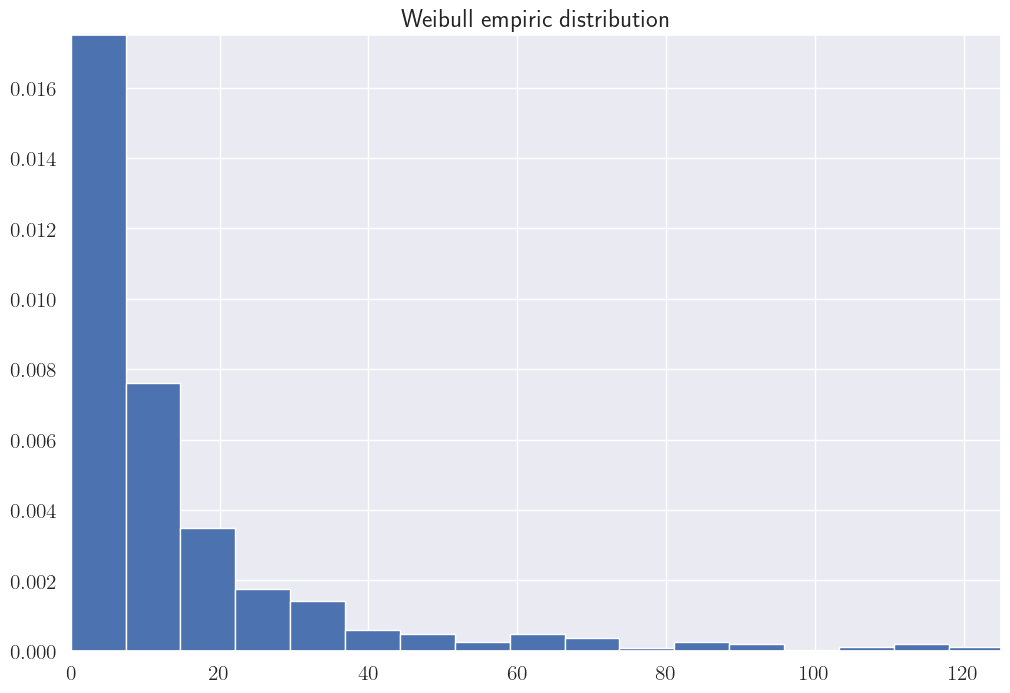

In [1777]:
plt.figure(figsize=(12, 8))
plt.hist(weibull_sample, density=True, bins=50)
plt.xlim(0, 125)
plt.ylim(0, 0.0175)
plt.title('Weibull empiric distribution', fontsize=18)
plt.show()

In [1779]:
from statsmodels.distributions.empirical_distribution import ECDF

In [1781]:
ecdf = ECDF(weibull_sample)

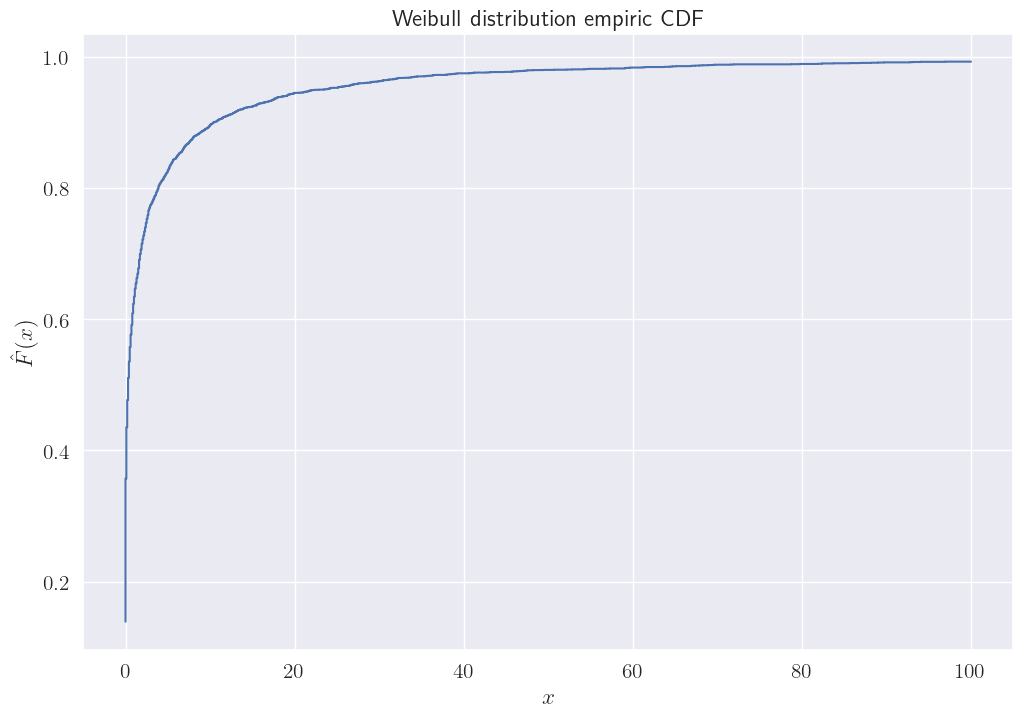

In [2301]:
grid = np.linspace(0, 100, 1000)
plt.figure(figsize=(12, 8))
plt.step(grid, ecdf(grid))
plt.title('Weibull distribution empiric CDF')
#plt.xlim(0, 4)
plt.xlabel(r'$x$')
plt.ylabel(r'$\hat{F}(x)$')
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам придумать решение этой проблемы и обосновать его применимость. Ситуация, когда статистическая модель не описывает какие-то артефакты в данных (как, например, нули в этой задаче) для практики типична, и с ней приходится что-то делать.

Ответьте на два вопроса:

а. Могут ли нули появляться если честно семплировать из распределения Вейбулла?

б. Зная плотность распределения и то, что компьютерная точность неабсолютна, откуда нули всё-таки взялись, учитывая то, что авторы задания сэмплировали выборку из распределения Вейбулла?

Посколько для любого сколь угодно близкого к нулю $x > 0$ выполняется $lim_{\gamma \to +0} F_\gamma(x) = 1 - e^{-1}$, получаем, что $F_\gamma(x) = 1 - e^{-1} + \mathcal{o}(1), \quad \gamma \to +0.$ То есть для достаточно малых $\gamma < 1$ имеем, что примерно $(1 - e^{-1})$-я часть всей выборки расположена в маленькой окрестности нуля. Строго математически мы даже можем для любых $\varepsilon > 0, \delta > 0$ подобрать такое $\gamma > 0$, что $F_\gamma(\delta) > 1 - e^{-1} - \varepsilon$, что означает, что с какой бы точностью компьютер ни определял числа, всегда найдется достаточно малое $\gamma > 0$, что $F_\gamma(0) > 0$, отсюда и возникают нули в выборке.

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:2146: RuntimeWarning: overflow encountered in power
  return (-sc.log1p(-q**(1.0/a)))**np.asarray(1.0/c)


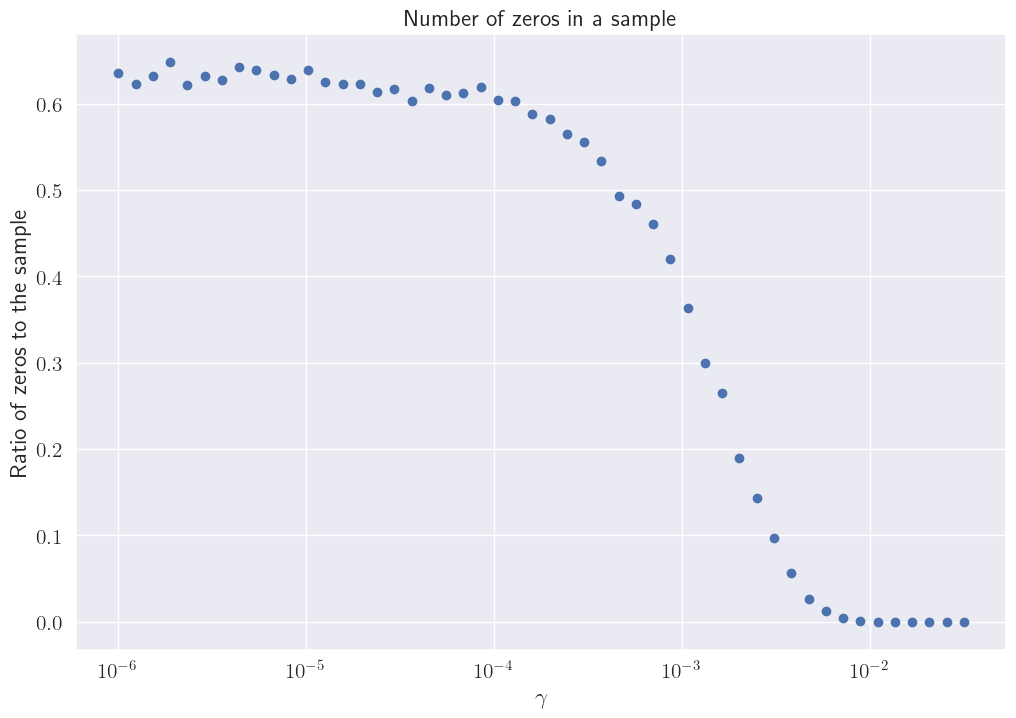

In [1785]:
N = 5000

gamma_arr = np.logspace(-6.0, -1.5, 50)
zeros_ratio = np.zeros(gamma_arr.size)

for idx, gamma in np.ndenumerate(gamma_arr):
    X = sps.exponweib.rvs(1, gamma, size=N)
    zeros_ratio[idx] = (X==0).sum()/N

plt.figure(figsize=(12, 8))
plt.scatter(gamma_arr, zeros_ratio)
plt.xscale('log')
plt.title('Number of zeros in a sample')
plt.xlabel(r'$\gamma$')
plt.ylabel('Ratio of zeros to the sample')
plt.show()

Ответ: видим, что действительно при малых значениях gamma в выборке могут появляться нули. Решение: поскольку итоговой эмпирической CDF $\hat{F}(x)$ все равно, что происходит в малой дельта-окрестности нуля (она всё равно равномерно сходится по т. Г-К к истинной), то можно все нулевые значения выбросить и рассматривать значения эмпирической функции в них, на результат это никак не повлияет. Также выкинем максимальное значение выборки, поскольку в ней значение эмпирической CDF равно 1, а это нам тоже нежелательно, что видно из формулы.

2. Посчитайте эмпирическую функцию распределения и
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки.

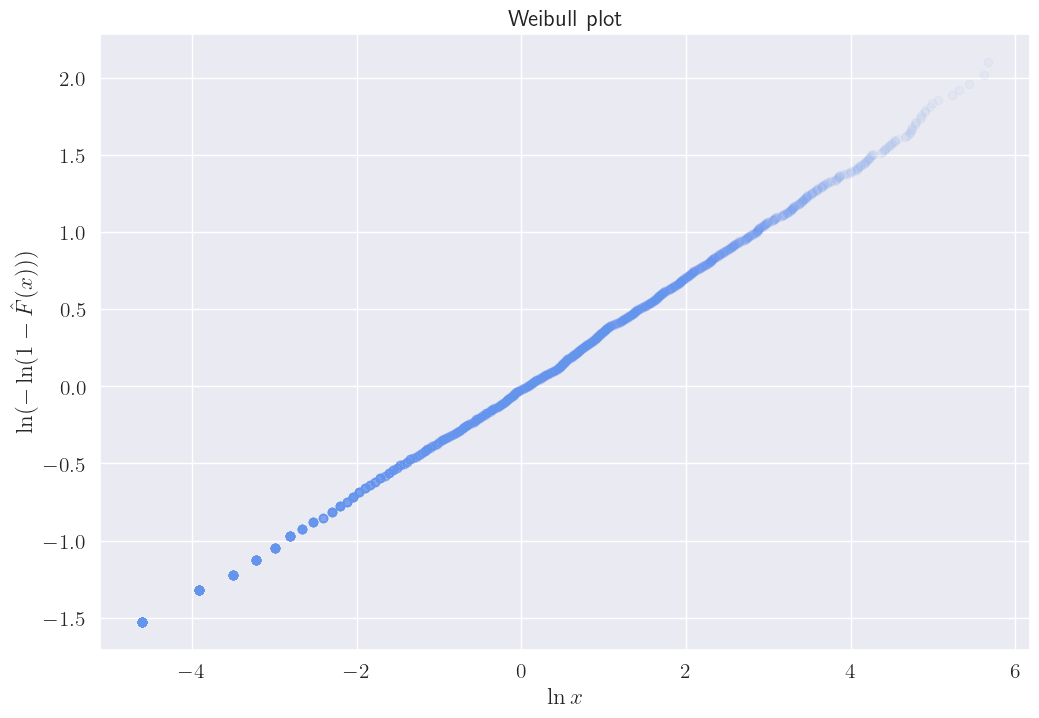

In [1795]:
x = weibull_sample[(weibull_sample > 0) & (weibull_sample < weibull_sample.max())]
x_new = np.log(x)
y_new = np.log(-np.log(1 - ecdf(x)))

plt.figure(figsize=(12, 8))
plt.scatter(x_new, y_new, alpha=0.05, c='cornflowerblue')
plt.title('Weibull plot')
plt.xlabel(r'$\ln x$')
plt.ylabel(r'$\ln (-\ln (1-\hat{F}(x)))$')
plt.show()

**Постройте** график (`plt.scatter`) от (y', x') для Ваших способов борьбы с нулями разными цветами.
Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод:** считаю свой способ верным, поскольку во всех рассматриваемых точках эмпирическая функция распределения совпадает с той, какой бы она была, если бы у компьютера была бесконечная точностью. Поэтому полученный график точно отображает поведение исходного распределения.

3. Оцените параметр формы методом максимального правдоподобия
* по
первым 4 годам;
* по всей выборке.

Мы предполагаем, что Вы будете производить максимизацию по сетке --- для некоторого множества возможных параметров постройте сетку с некоторым шагом (для определённости возьмите шаг равный $10^{-3}$) и выберите лучший параметр на этой сетке. Известно, что $\log_{10}\gamma \in [-2, 2].$

Однако, если Вы хорошо поняли курс оптимизации, то можете написать оптимизатор, который находит максимум сам. Задачу можно переформулировать, чтобы ответ не изменился, а оптимизация шла быстрее. За хорошо сформулированную оптимизационную задачу и реализацию мы добавим 5 бонусных баллов.

Решение: функция правдоподобия $$f(X\,|\,\gamma) = \prod_{i = 1}^{N} \gamma\cdot x^{\gamma - 1}\cdot e^{-x^\gamma} = \gamma^N\cdot(x_1\cdot \ldots \cdot x_N)^{\gamma - 1}\cdot \exp(-x_1^\gamma - \ldots -x_N^\gamma)$$ $$L(X\,|\,\gamma) = N\ln{\gamma} + (\gamma - 1)\cdot \sum_{i  = 1}^{N}\ln{x_i}-\sum_{i = 1}^{N}x_i^\gamma.$$ Будем предполагать, что $\gamma \in [0.01, 1.0)$, меньше единицы по описанным выше причинам (иначе не было бы таких аномалий в нуле).

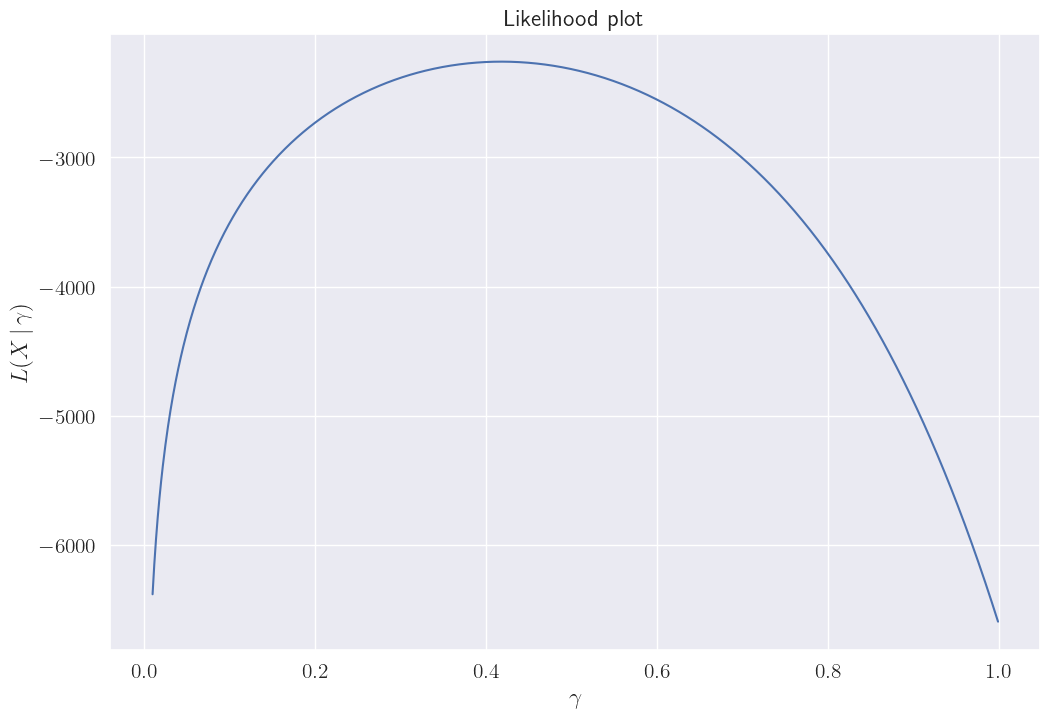

Optimal gamma: 0.418


In [2307]:
eps = 1e-3
gamma_lower = 0.01
gamma_upper = 1.0
gamma_grid = np.arange(gamma_lower, gamma_upper, eps)
grid_size = gamma_grid.shape[0]

X = weibull_sample[:1460]
X = X[X > 0]
N = X.shape[0]
L = np.zeros(grid_size)

for idx, gamma in np.ndenumerate(gamma_grid):
    L[idx] = N*np.log(gamma) + (gamma - 1)*(np.log(X)).sum() - (X**gamma).sum()

plt.figure(figsize=(12, 8))
plt.plot(gamma_grid, L)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$L(X\,|\,\gamma)$')
plt.title('Likelihood plot')
plt.show()
print('Optimal gamma: %.3f' % (gamma_grid[L.argmax()], ))

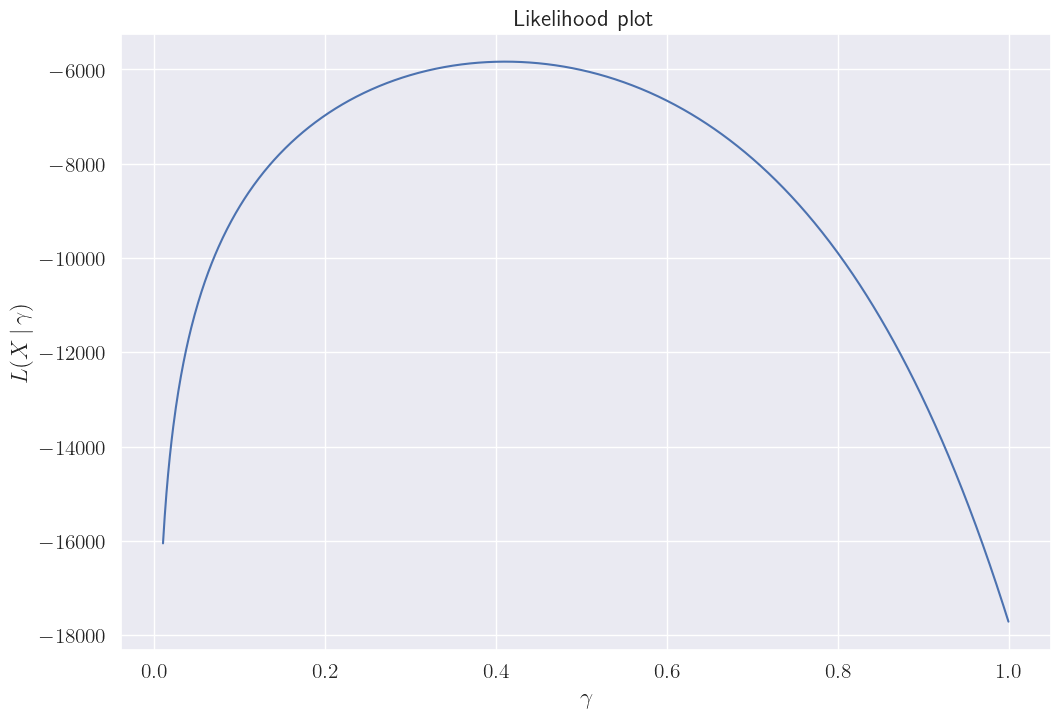

Optimal gamma: 0.410


In [2309]:
eps = 1e-3
gamma_lower = 0.01
gamma_upper = 1.0
gamma_grid = np.arange(gamma_lower, gamma_upper, eps)
grid_size = gamma_grid.shape[0]

X = weibull_sample[(weibull_sample > 0) & (weibull_sample <= weibull_sample.max())]
N = X.shape[0]
L = np.zeros(grid_size)

for idx, gamma in np.ndenumerate(gamma_grid):
    L[idx] = N*np.log(gamma) + (gamma - 1)*(np.log(X)).sum() - (X**gamma).sum()

plt.figure(figsize=(12, 8))
plt.plot(gamma_grid, L)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$L(X\,|\,\gamma)$')
plt.title('Likelihood plot')
plt.show()
print('Optimal gamma: %.3f' % (gamma_grid[L.argmax()], ))

Найдите в библиотеке `scipy.stats` класс, отвечающий за данное семейство распределений (будьте аккуратны, внимательно читайте документацию!), и изучите его метод `fit`. Как он находит оценку параметра? Примените эту функцию к нашим данным и сравните полученные результаты с результатами выше.

*Замечание.* Обратите внимание, для чего именно сей метод находит оценку? Сделайте так, чтобы он возвращал оценку непосредственно для интересующего нас параметра.

Ответ: метод находит параметр всё так же по методу моментов.

In [2312]:
b = sps.exponweib.fit(weibull_sample[weibull_sample > 0], fa=1, fscale=1, floc=0.0)

print('Optimal gamma: %.3f' % (b[1], ), '- mathes the MLE above')

Optimal gamma: 0.410 - mathes the MLE above


4. Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

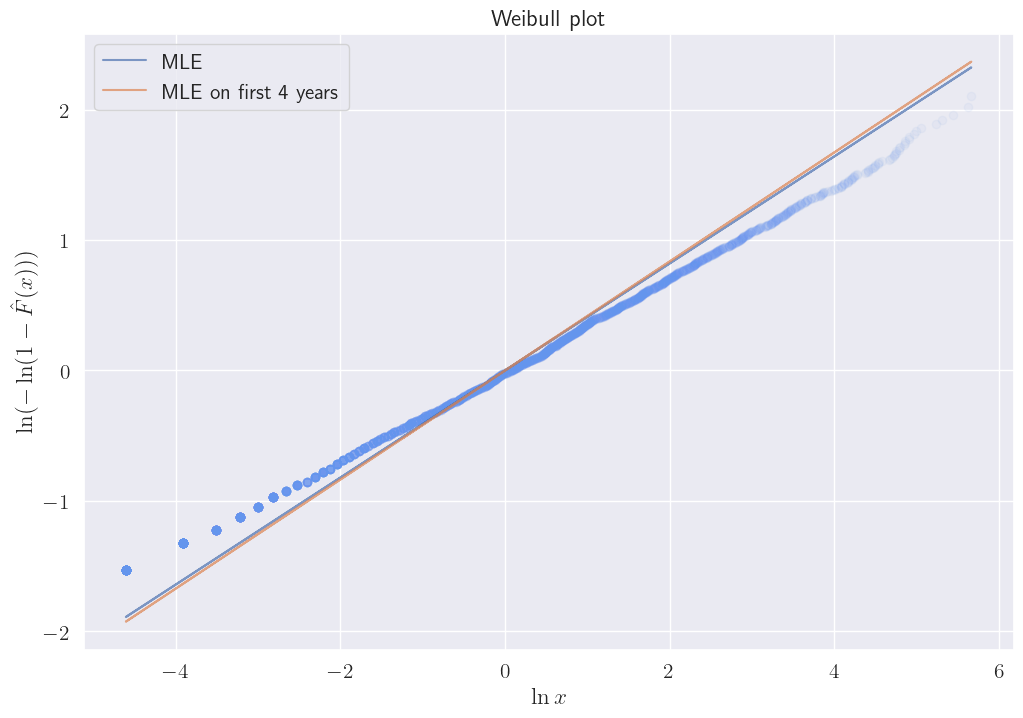

In [2317]:
plt.figure(figsize=(12, 8))
plt.scatter(x_new, y_new, alpha=0.05, c='cornflowerblue')
plt.plot(x_new, b[1]*x_new, alpha=0.7, label='MLE')
plt.plot(x_new, 0.418*x_new, alpha=0.7, label='MLE on first 4 years')

plt.title('Weibull plot')
plt.legend()
plt.xlabel(r'$\ln x$')
plt.ylabel(r'$\ln (-\ln (1-\hat{F}(x)))$')
plt.show()

**Вывод** видим, что при увеличении размера выборки коэффициент $\gamma$ стремится к некоторому стационарному значению $0.410$. Полученный методом максимального правдоподобия коэффициент не до соответствует действительности (наблюдаемой по weibull-plot)так как большое количествоц ценной (их логарифм в силу их малости давал бы большой вклад в суммарно правдоподобие) информации (точки в окрестности нуля, в нашем случае просто нули) было потеряно при обработке выборки.=

## Задача 3

Хорошим методом получения аналитических оценок является метод моментов.

1. Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**, см. [Википедию](https://en.wikipedia.org/wiki/Gamma_distribution)), $\theta = 3$ для всех распределений $(N = 1000).$ Посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Промоделируйте полученные оценки для разных размеров выборки $n < N$ и изучите их скорости сходимости. На графике отразите истинный параметр. Можете построить отдельный график модуля/квадрата разности оценки и параметра (риск) для какой-то выборке и посмотреть, как быстро риск сходится к нулю.

In [559]:
theta = 3
N = 1000
X_norm = sps.norm.rvs(scale=np.sqrt(theta), size=N)
X_unif = sps.uniform.rvs(scale=theta, size=N)
X_gamma = sps.gamma.rvs(a=1, scale=theta, size=N)

Решение (вывод метода моментов для каждого случая):

* Нормальное: $$\theta = \mathbb{D}X_1 = \mathbb{E}X_1^2, \quad \mathbb{E}\overline{X^2} = \theta \Rightarrow \hat{\theta}(X) = \overline{X^2}$$
* Равномерное $$\theta = 2\cdot\mathbb{E}X_1, \quad \mathbb{E}\overline{X} = \theta/2 \Rightarrow \hat{\theta}(X) = 2\cdot\overline{X}$$
* Гамма: $$\theta = \mathbb{E}X_1, \quad \mathbb{E}\overline{X} = \theta \Rightarrow \hat{\theta}(X) = \overline{X}$$

In [562]:
print('Оценка theta по методу моментов для нормального распределения: %.5f' % ((X_norm**2).mean(), ))
print('Оценка theta по методу моментов для равномерного распределения: %.5f' % (2 * X_unif.mean(), ))
print('Оценка theta по методу моментов для гамма-распределения: %.5f' % (X_gamma.mean(), ))

Оценка theta по методу моментов для нормального распределения: 3.11078
Оценка theta по методу моментов для равномерного распределения: 2.96365
Оценка theta по методу моментов для гамма-распределения: 3.12432


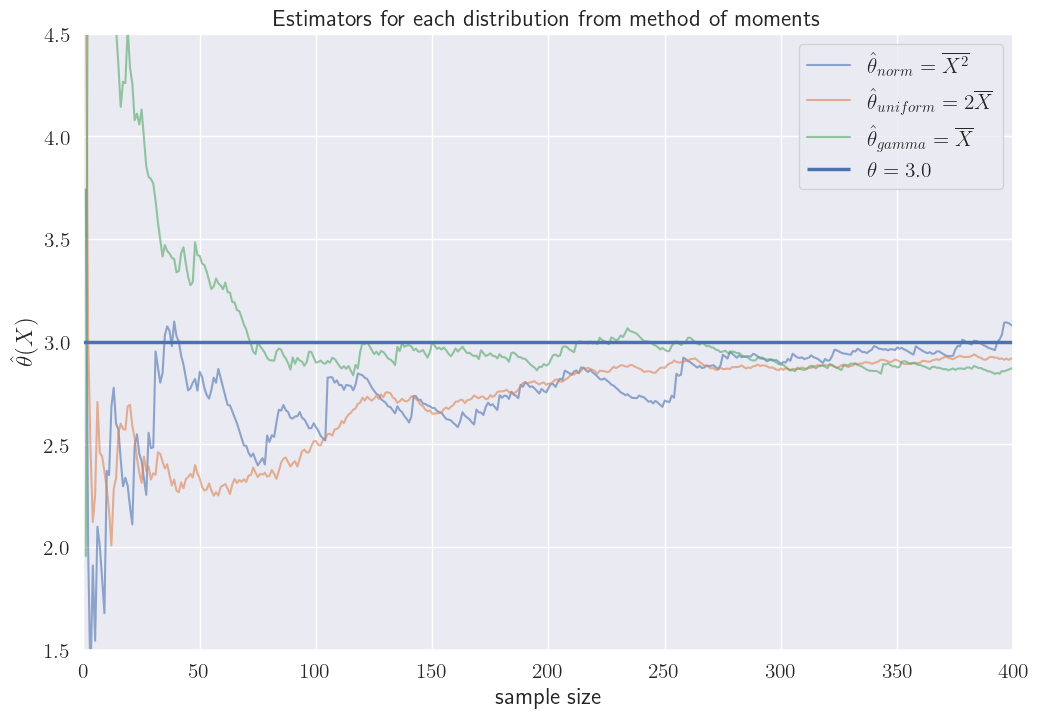

In [634]:
est_norm = np.cumsum(X_norm**2)/np.arange(1, N + 1)
est_unif = np.cumsum(2*X_unif)/np.arange(1, N + 1)
est_gamma = np.cumsum(X_gamma)/np.arange(1, N + 1)

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, N + 1), est_norm, alpha=0.6, label=r'$\hat{\theta}_{norm} = \overline{X^2}$')
plt.plot(np.arange(1, N + 1), est_unif, alpha=0.6, label=r'$\hat{\theta}_{uniform} = 2\overline{X}$')
plt.plot(np.arange(1, N + 1), est_gamma, alpha=0.6, label=r'$\hat{\theta}_{gamma} = \overline{X}$')
plt.hlines(y=theta, xmin=0, xmax=1000, label=r'$\theta = %.1f$' % (theta, ), linewidth=2.5)
plt.title('Estimators for each distribution from method of moments')
plt.ylim(1.5, 4.5)
plt.xlim(0, 400)
plt.xlabel('sample size')
plt.ylabel(r'$\hat{\theta}(X)$')
plt.legend()
plt.show()

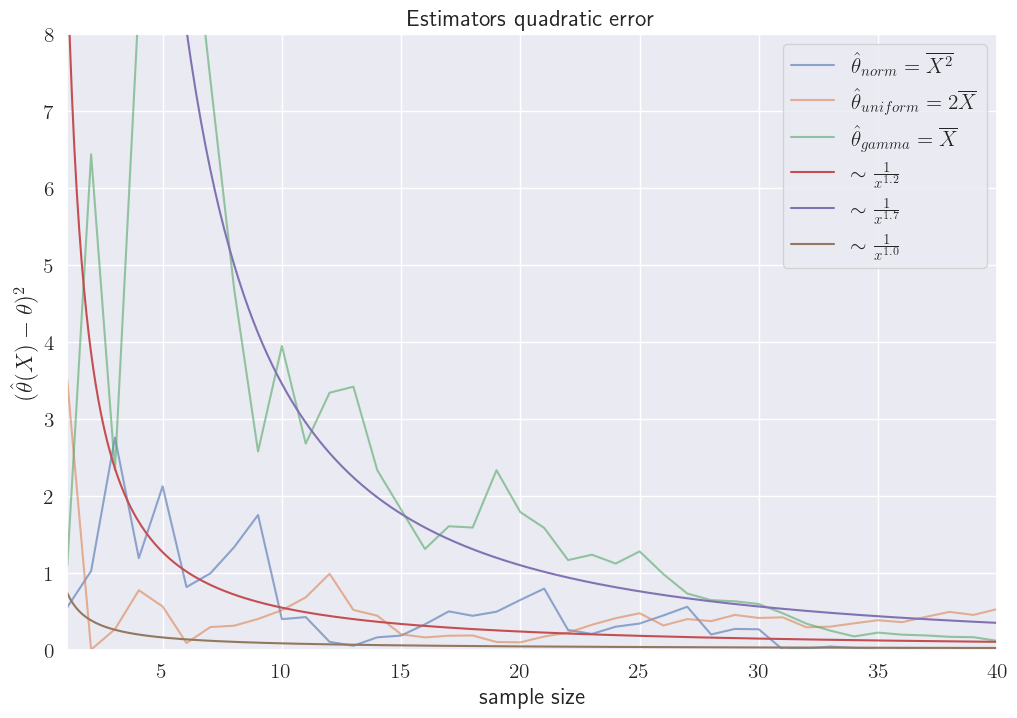

In [896]:
grid_n = np.arange(1, N + 1)
grid_smooth = np.linspace(1, N, 10000)

est_norm_err = abs(np.cumsum(X_norm**2)/grid_n - theta)**2
est_unif_err = abs(np.cumsum(2*X_unif)/grid_n - theta)**2
est_gamma_err = abs(np.cumsum(X_gamma)/grid_n - theta)**2

plt.figure(figsize=(12, 8))
plt.plot(grid_n, est_norm_err, alpha=0.6, label=r'$\hat{\theta}_{norm} = \overline{X^2}$')
plt.plot(grid_n, est_unif_err, alpha=0.6, label=r'$\hat{\theta}_{uniform} = 2\overline{X}$')
plt.plot(grid_n, est_gamma_err, alpha=0.6, label=r'$\hat{\theta}_{gamma} = \overline{X}$')
plt.plot(grid_smooth, np.exp(res_norm.intercept)*(grid_smooth**res_norm.slope), label=r'$\sim\frac{1}{x^{%.1f}}$' % (-res_norm.slope, ))
plt.plot(grid_smooth, np.exp(res_uniform.intercept)*(grid_smooth**res_uniform.slope), label=r'$\sim\frac{1}{x^{%.1f}}$' % (-res_uniform.slope, ))
plt.plot(grid_smooth, np.exp(res_gamma.intercept)*(grid_smooth**res_gamma.slope), label=r'$\sim\frac{1}{x^{%.1f}}$' % (-res_gamma.slope, ))
plt.title('Estimators quadratic error')
plt.xlim(1, 40)
plt.ylim(0, 8)
plt.xlabel('sample size')
plt.ylabel(r'$(\hat{\theta}(X) - \theta)^2$')
plt.legend()
plt.show()

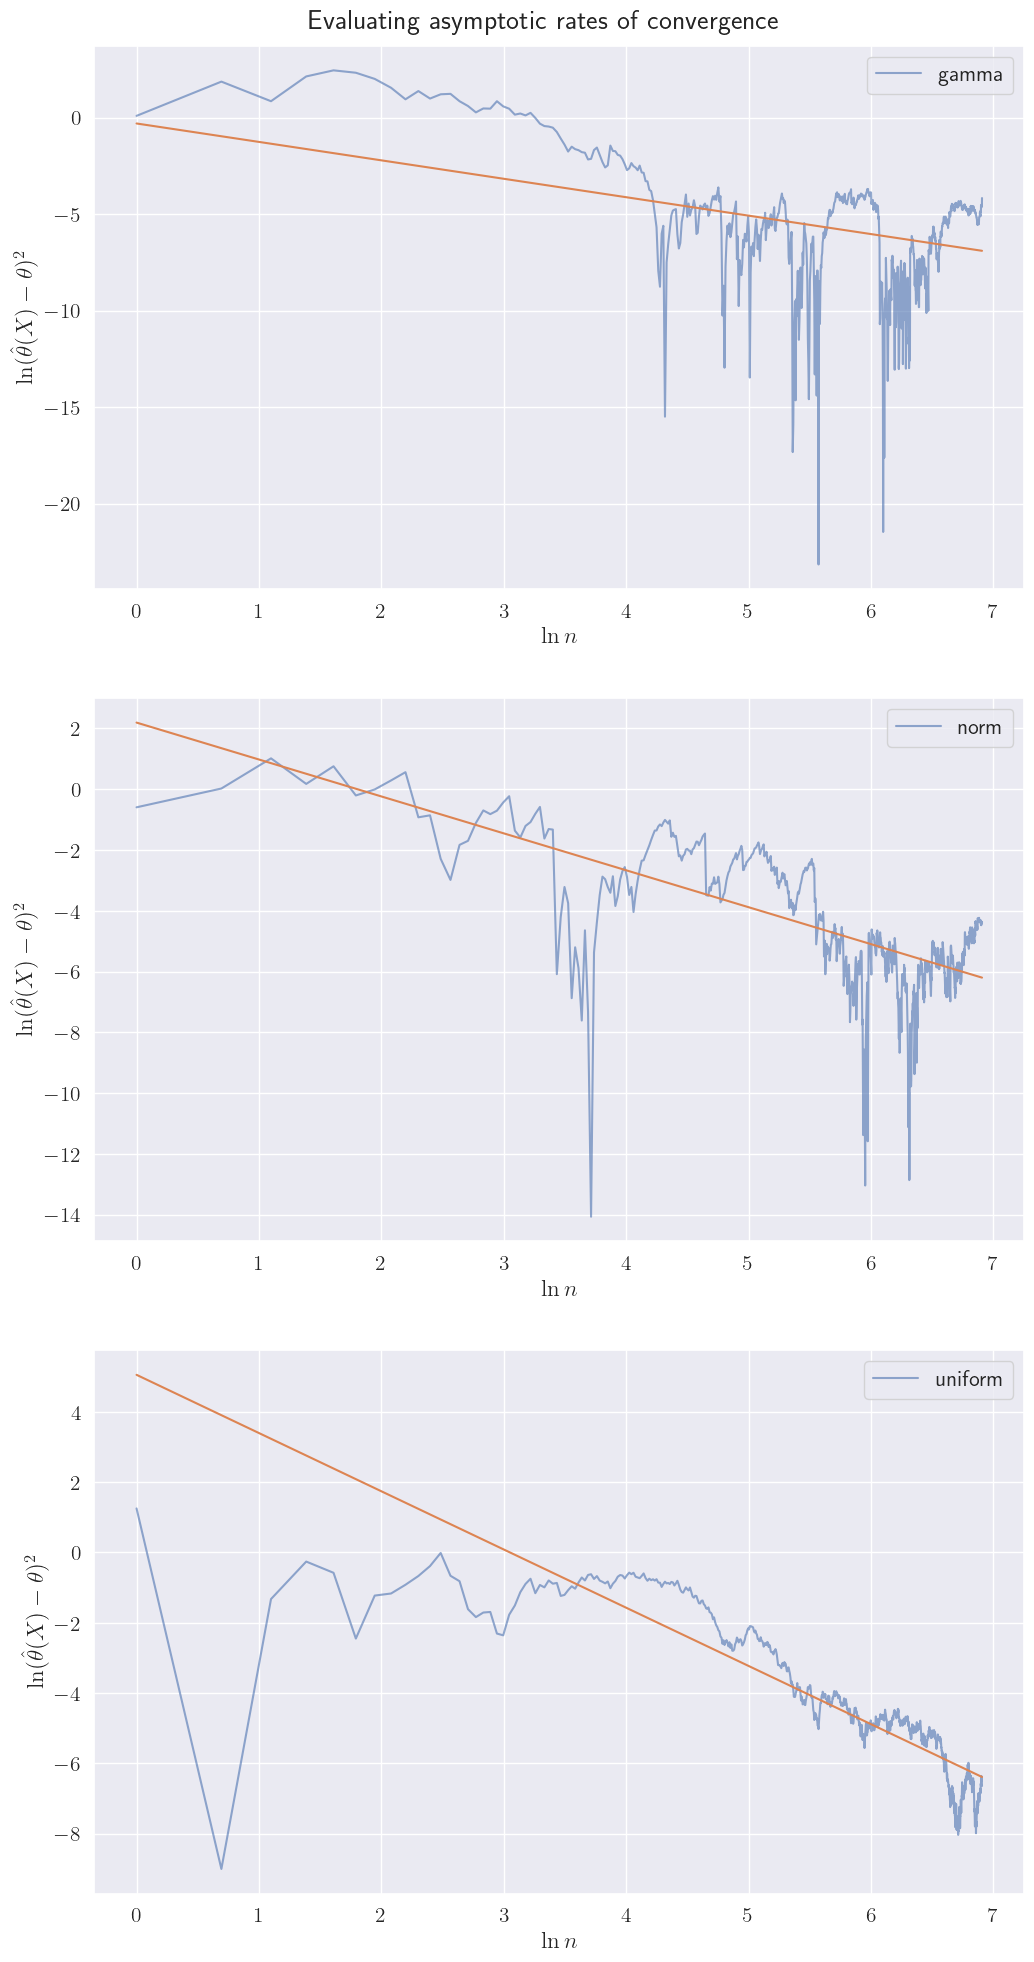

Gamma inter: -0.306725, slope: -0.954651
Norm inter: 2.190132, slope: -1.214570
Uniform inter: 5.051882, slope: -1.655825


In [787]:
res_gamma = sps.linregress(np.log(grid_n), np.log(est_gamma_err))
res_norm = sps.linregress(np.log(grid_n), np.log(est_norm_err))
res_uniform = sps.linregress(np.log(grid_n), np.log(est_unif_err))

fig, axs = plt.subplots(3, figsize=(12, 24))
fig.suptitle('Evaluating asymptotic rates of convergence', y=0.895, fontsize=20)
axs[0].plot(np.log(grid_n), np.log(est_gamma_err), alpha=0.6, label=r'gamma')
axs[0].plot(np.log(grid_n), res_gamma.intercept + res_gamma.slope*np.log(grid_n))
axs[0].set_xlabel(r'$\ln{n}$')
axs[0].set_ylabel(r'$\ln(\hat{\theta}(X) - \theta)^2$')
axs[0].legend(fontsize=16)
axs[1].plot(np.log(grid_n), np.log(est_norm_err), alpha=0.6, label=r'norm')
axs[1].plot(np.log(grid_n), res_norm.intercept + res_norm.slope*np.log(grid_n))
axs[1].set_xlabel(r'$\ln{n}$')
axs[1].set_ylabel(r'$\ln(\hat{\theta}(X) - \theta)^2$')
axs[1].legend(fontsize=16)
axs[2].plot(np.log(grid_n), np.log(est_unif_err), alpha=0.6, label=r'uniform')
axs[2].plot(np.log(grid_n), res_uniform.intercept + res_uniform.slope*np.log(grid_n))
axs[2].set_xlabel(r'$\ln{n}$')
axs[2].set_ylabel(r'$\ln(\hat{\theta}(X) - \theta)^2$')
axs[2].legend(fontsize=16)

plt.show()
print('Gamma inter: %f, slope: %f' % (res_gamma.intercept, res_gamma.slope))
print('Norm inter: %f, slope: %f' % (res_norm.intercept, res_norm.slope))
print('Uniform inter: %f, slope: %f' % (res_uniform.intercept, res_uniform.slope))

2. Есть два замечательных распределения, которые игнорировать никак нельзя. Первое --- $Pareto(k)$ с плотностью $p(x) = kx^{-k-1} I( x \ge 1)$, где $k > 0$. Второе --- $Cauchy(0, \theta)$  с плотностью $p(x) = \frac{\theta}{\pi(x^2 + \theta^2)}$. Запишите оценки методом моментов для них и проверьте их на состоятельность на практике. Для моделирования возьмите то же значение параметра, что дано выше.

*Подсказка:* внимательно изучите, чему равны моменты каждого из распределений и при каких условиях. Можно ли гарантировать состоятельность полученных оценок каким-то теоретическими фактами?

Решение (аналитический вывод оценок):
* Pareto(k): $$g(x) = x^m, \quad \mathbb{E}g(X_1) = \int_1^{+\infty} k x^{m - k - 1}\, dx = \frac{k}{k - m}\quad \text{при} \quad m < k.$$ Чтобы необходимое неравенство выполнялось всегда можем взять $m = -1$ и соответственно оценку $\overline{1/X}$. Тогда $$\mathbb{E}\frac{1}{X_1} = \frac{k}{k + 1} \Rightarrow \hat{k} = \frac{\overline{1/X}}{1 - \overline{1/X}}.$$

* Cauchy$(0, \theta)$: $$g(x) = \sqrt{|x|}, \quad \mathbb{E}g(X_1) = 2\int_0^{+\infty}\frac{\theta\sqrt{x}\, dx}{\pi(\theta^2 + x^2)} = \frac{2\sqrt{\theta}}{\pi}\int_0^{+\infty}\frac{\sqrt{y}\, dy}{1 + y^2} = \sqrt{2\theta} \quad \Rightarrow \quad \hat{\theta}(X) = \frac{\overline{\sqrt{|X|}}}{2}$$

Состоятельность (на самом деле даже сильная состоятельность)полученных оценок гарантируется из теории за счёт того, что полученные в обоих случаях функции $m(\theta) = \sqrt{2\theta}, \quad m(k) = \frac{k}{k + 1}$ являются непрерывными биекциями на своих областях определения $\{\theta > 0\}$ и $\{k > 0\}$ и имеют непрерывные обратные, записанные выше, что (из теоремы математической статистики о корректности метода моментов) и гарантирует сильную состоятельность полученных оценок.

Моделирование:

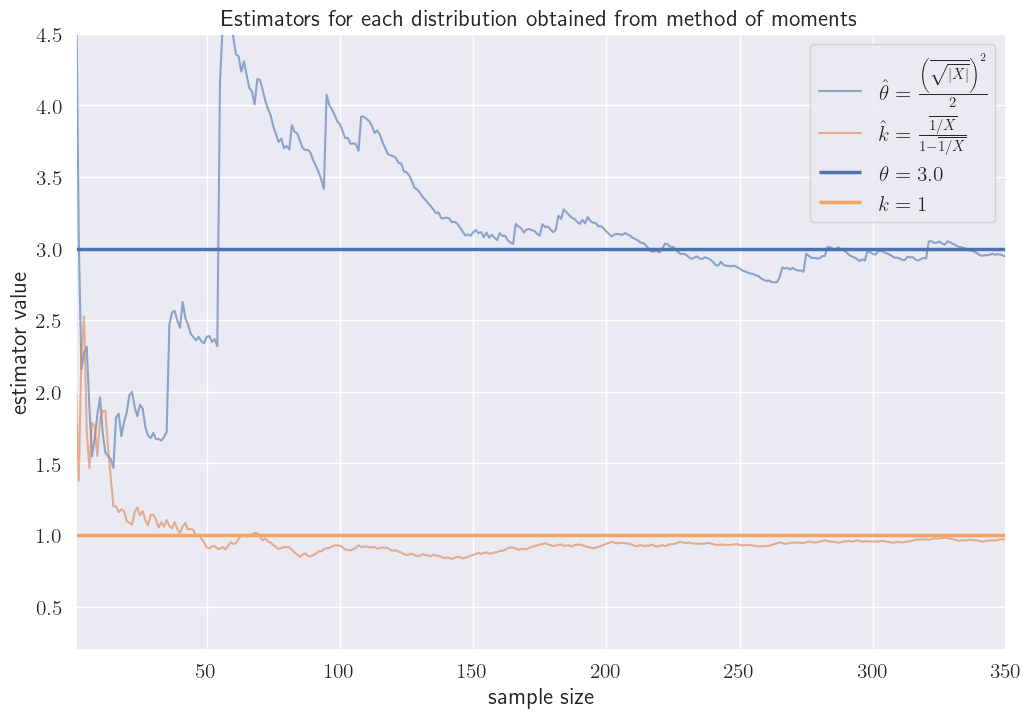

In [1862]:
theta = 3
k = 1.0
N = 1000
X_cauchy = sps.cauchy.rvs(scale=theta, size=N)
X_pareto = sps.pareto.rvs(b=k, size=N)

X_sqrt_mean = np.cumsum(abs(X_cauchy)**0.5)/np.arange(1, N + 1)
est_cauchy = (X_sqrt_mean**2)/2
X_inv_mean = np.cumsum(1/X_pareto)/np.arange(1, N + 1)
est_pareto = X_inv_mean/(1 - X_inv_mean)

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, N + 1), est_cauchy, alpha=0.6, label=r'$\hat{\theta} = \frac{\left(\overline{\sqrt{|X|}}\right)^2}{2}$')
plt.plot(np.arange(1, N + 1), est_pareto, alpha=0.6, label=r'$\hat{k} = \frac{\overline{1/X}}{1 - \overline{1/X}}$')
plt.hlines(y=theta, xmin=0, xmax=N, label=r'$\theta = %.1f$' % (theta, ), linewidth=2.5)
plt.hlines(y=k, xmin=1, xmax=N, label=r'$k = %.f$' % (k, ), linewidth=2.5, color='sandybrown')
plt.title('Estimators for each distribution obtained from method of moments')
plt.ylim(0.2, 4.5)
plt.xlim(1, 350)
plt.xlabel('sample size')
plt.ylabel('estimator value')
plt.legend()
plt.show()

Проверка состоятельности

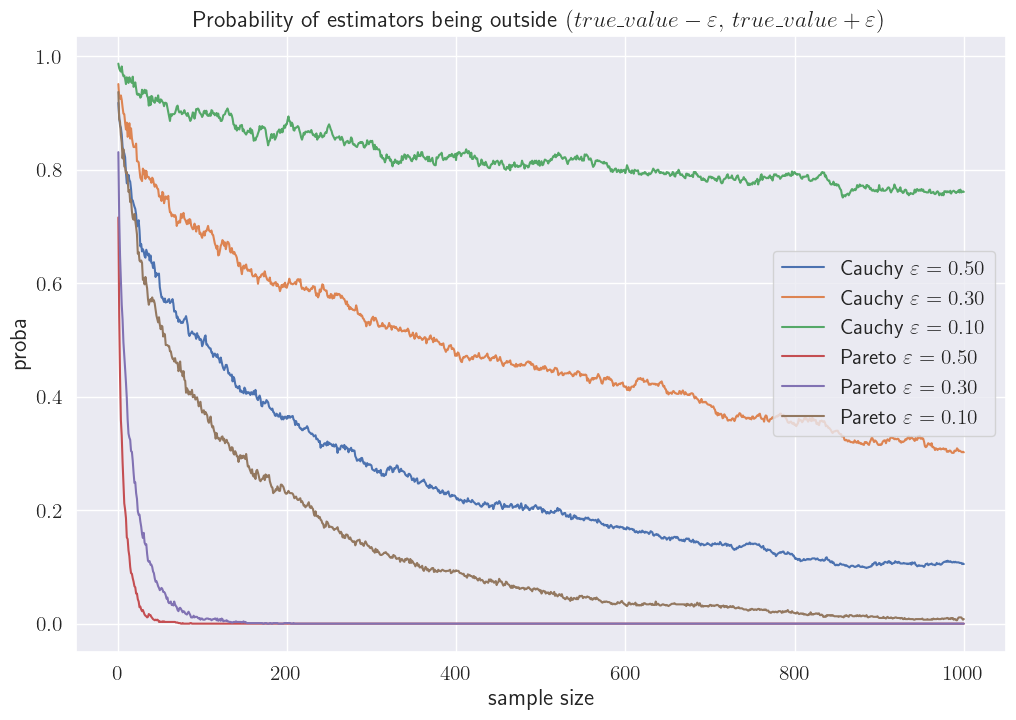

In [1301]:
eps = np.array([0.5, 0.3, 0.1])

plt.figure(figsize=(12, 8))
plt.title(r'Probability of estimators being outside $(true\_value-\varepsilon, \, true\_value + \varepsilon)$')

X_cauchy = sps.cauchy.rvs(scale=theta, size=(N, N))
X_pareto = sps.pareto.rvs(b=k, size=(N, N))

X_sqrt_mean = np.cumsum(abs(X_cauchy)**0.5, axis=1)/np.arange(1, N + 1)
est_cauchy = (X_sqrt_mean**2)/2
X_inv_mean = np.cumsum(1/X_pareto, axis=1)/np.arange(1, N + 1)
est_pareto = X_inv_mean/(1 - X_inv_mean)

for val in eps:
    prob = (abs(est_cauchy - theta) > val).sum(axis=0)/N
    plt.plot(np.arange(1, N + 1), prob, label=r'Cauchy $\varepsilon = %.2f$' % (val, ))

for val in eps:
    prob = (abs(est_pareto - k) > val).sum(axis=0)/N
    plt.plot(np.arange(1, N + 1), prob, label=r'Pareto $\varepsilon = %.2f$' % (val, ))

plt.xlabel('sample size')
plt.ylabel('proba')
plt.legend()
plt.show()

**Вывод:** видим что:
1) Полученные оценки действительно приближают исходные параметры;
2) С точностью вплоть до $\varepsilon = 0.3$ можно утверждать что оценки являются состоятельными в силу стремления к нулю вероятности $P(|\hat{\theta} - \theta| \ge \varepsilon)$.

**Следующие две задачи посвящены тому, как получать более информативные оценки, чем точечные. Нам приходится обращаться к ним, так как свойства точечных оценок являются предельными, и мы мало что знаем о том, насколько конкретное значение оценки близко к истинному значению параметра. В условиях кровавой войны информация должна быть максимальной.**

### Задача 4. Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка) и какой-то отрезок, в который параметр попадёт с высокой вероятностью (такой отрезок называется **доверительным интервалом**_. На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Вспомним, как работает **метод подстановки** для получения оценок. В нём мы выражаем параметр при помощи распределения (как среднее или медиана, например), потом меняем распределение на эмпирическое и выражаем параметр уже через него. Бутстреп это подмена истинного распределения на эмпирическое.



1. Для каждого распределения из задачи 3 (в том числе из пункта 2) сгенерируйте выборку размера $N = 1000$. Далее замените Ваше распределение на равномерное распределение по построенной выборке (по теореме Гливенко-Кантелли эти распределения достаточно близки), и из эмпирического (равномерного) распределения постройте 100 выборок. Опишите, как Вы будете это делать.

*Указание:* из истинного распределения (нормального и т.д.) новые данные генерировать **нельзя**. Бутстреп это способ получения псевдо-новых данных из уже имеющихся.

Ответ: пусть $X: \Omega \rightarrow \mathbb{R}$ - с.в. и $F(t)$ - её ФР. Имеем $Y \sim U[0, 1]$. Хотим $F^{-1}(y) = \inf \left\{t\, | \, F(t) \ge y \right\}$. Переиндексируем выборку , чтобы все значения шли в порядке неубывания $x_1 \le x_2 \le \ldots \le x_N$. Тогда заметим, что отрезок разбивается на дизъюнктное объединение $\left[0, 1\right] = \left(0, \frac{1}{N}\right] \sqcup \left(\frac{1}{N}, \frac{2}{N}\right] \sqcup \ldots \sqcup \left(\frac{N - 1}{N}, 1\right]$ за вычетом быть может множества меры нуль состоящее из одного нуля. Вероятность попасть в каждое из это множество равна $1/N$, а $\forall y \in \left(\frac{n - 1}{N}, \frac{n}{N}\right] \, n = 1, \ldots N$ имеем $\hat{F}^{-1}(y) = x_n$. Таким образом для формирования равномерной бутстреп выборки нам достаточно равномерного распределения на дискретном множестве индексов элементов, что эквивалентно тому, что из выборки выбираются элементы с возвращением.

In [1868]:
theta = 3
k = 1.0
N = 1000
n = 100
X_norm = sps.norm.rvs(scale=np.sqrt(theta), size=N)
X_unif = sps.uniform.rvs(scale=theta, size=N)
X_gamma = sps.gamma.rvs(a=k, scale=theta, size=N)
X_cauchy = sps.cauchy.rvs(scale=theta, size=N)
X_pareto = sps.pareto.rvs(b=k, size=N)

In [1870]:
bootstrap = np.random.randint(0, N, (n, N))
X_norm_new = X_norm[bootstrap]
X_unif_new = X_unif[bootstrap]
X_gamma_new = X_gamma[bootstrap]
X_cauchy_new = X_cauchy[bootstrap]
X_pareto_new = X_pareto[bootstrap]
print(X_norm_new.shape)

(100, 1000)


2. Для каждой псевдо-выборки из предыдущего пункта постройте оценку методом моментов из задачи 3: получится выборка оценок (как в домашке 1). По ней посчитайте эмпирическую (выборочную) дисперсию оценок и сделайте вывод о том, как связано значение дисперсии оценки (эмпирической и бутстрепной) с точностью и скоростью сходимости оценки к параметру.

In [1873]:
est_norm = (X_norm_new**2).mean(-1)
est_unif = 2*X_unif_new.mean(-1)
est_gamma = X_gamma_new.mean(-1)
est_cauchy = (((abs(X_cauchy_new)**0.5).mean(-1))**2)/2
par_inv_mean = (1/X_pareto_new).mean(-1)
est_pareto = par_inv_mean/(1 - par_inv_mean)
print('Normal distribution bootstrapped estimator (mean, variance): (%.5f, %.5f)' % (est_norm.mean(), est_norm.var()))
print('Uniform distribution bootstrapped estimator (mean, variance): (%.5f, %.5f)' % (est_unif.mean(), est_unif.var()))
print('Gamma distribution bootstrapped estimator (mean, variance): (%.5f, %.5f)' % (est_gamma.mean(), est_gamma.var()))
print('Cauchy distribution bootstrapped estimator (mean, variance): (%.5f, %.5f)' % (est_cauchy.mean(), est_cauchy.var()))
print('Pareto distribution bootstrapped estimator (mean, variance): (%.5f, %.5f)' % (est_pareto.mean(), est_pareto.var()))

Normal distribution bootstrapped estimator (mean, variance): (3.12455, 0.01797)
Uniform distribution bootstrapped estimator (mean, variance): (2.94731, 0.00277)
Gamma distribution bootstrapped estimator (mean, variance): (2.98030, 0.00863)
Cauchy distribution bootstrapped estimator (mean, variance): (3.01945, 0.05805)
Pareto distribution bootstrapped estimator (mean, variance): (0.98666, 0.00108)


Согласно утстрепная (выборочная) дисперсия оценок является (вследствие многочисленного числа теорем математической статистики, доказанных с использованием продвинутых методов функционального анализа) хорошим приближением эмпирической дисперсии оценок (как если бы мы создавали выборку выборок и считали дисперсию по ним), т.е. хорошим приближением риска оценки.

3. Как мы знаем, оценка методом моментов не гарантирует несмещённости. При помощи метода бутстрапирования найдите смещение (разницу между мат. ожиданием оценки и значением параметра) каждой оценки. Какие оценки (в теории) несмещённые?

In [1877]:
print('Normal distribution bootstrapped estimator bias: %.5f' % (theta - est_norm.mean(), ))
print('Uniform distribution bootstrapped estimator bias: %.5f' % (theta - est_unif.mean(), ))
print('Gamma distribution bootstrapped estimator bias: %.5f' % (theta - est_gamma.mean(), ))
print('Cauchy distribution bootstrapped estimator bias: %.5f' % (theta - est_cauchy.mean(), ))
print('Pareto distribution bootstrapped estimator bias: %.5f' % (k - est_pareto.mean(), ))

Normal distribution bootstrapped estimator bias: -0.12455
Uniform distribution bootstrapped estimator bias: 0.05269
Gamma distribution bootstrapped estimator bias: 0.01970
Cauchy distribution bootstrapped estimator bias: -0.01945
Pareto distribution bootstrapped estimator bias: 0.01334


**Вывод:** из теории известно, что несмещёнными будут оценки для равномерного и гамма распределений. Для нормального будет несмещённой с точностью до домножения на $\frac{N}{N - 1}$. Остальные будут несмещёнными, однако видно, что даже так при бутстрапировании смещение получается не очень большим.

### Задача 5. Байес.

**Эта задача является бонусной и стоит 30 (!!!) баллов**

Байесовское оценивание даёт ультиматимативный способ построения оценок без какой-либо потери в информации. Теперь мы оцениваем параметры распределения не точками и не отрезками, а распределениями!

1. Будем смотреть на параметрическое семейство распределений как на условное распределение: $P_{\theta} = P(X | \theta)$. В байесовском подходе подразумевается, что параметр $\theta$ сам приходит из некоторого **априорного** распределения (которое статист либо предпологает сам, либо предпологает исходя из внешних знаний об области).

Вспомним теорему Байеса: $p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)}$, где знаменатель $p(x)$ получается как интеграл по $\theta$ от числителя. В зависимости от того, можем ли мы взять этот интеграл, выбирается тип байесовской оценки. $p(X | \theta)$ мы знаем, это хорошо нам знакомое правдоподобие, $p(\theta)$ называется априорным распределением (prior) параметра, мы его выбираем сами исходя из наших предпочтений, $p(X)$ от параметра не зависит и называется обоснованностью (evidence), и показывает, насколько правдоподобна выборка в терминах выбранного семейства распределений.

Скачайте датасет сердечных заболеваний: https://colab.research.google.com/drive/1J5ujdgEDwLhie13d4XDd3manrNe_c3Ek#scrollTo=vd8WgXL3jjzL

In [2133]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
X_pd = heart_disease.data.features 
Y_pd = heart_disease.data.targets 

In [2134]:
print(X_pd.info())
print(Y_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None


In [2137]:
X_pd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [2139]:
Y_pd.head()

,num
0,0
1,2
2,1
3,0
4,0


In [2141]:
Y = y_pd.to_numpy()

Мы будем предсказывать наличие и степень выраженности болезни (переменная num) это наличие, используя следующие параметры: age, sex, chol, fbs

Переменная num имеет категориальное распределение. Напишите его плотность и докажите, что сопряжённым к нему будет распределение Дирихле https://en.wikipedia.org/wiki/Dirichlet_distribution.

Доказательство: num принимает всего 5 значений $\{0, 1, 2, 3, 4\}$ то есть имеем 5 разных  категорий. Найдём вероятности попасть в каждую из категорий:

In [2146]:
for k in range(5):
    print('p_%d = %.3f' % (k, np.count_nonzero(Y == k)/Y.size))

p_0 = 0.541
p_1 = 0.182
p_2 = 0.119
p_3 = 0.116
p_4 = 0.043


Имеем распределение с плотностью $p(x) = p_0 [x = 0] + p_1 [x = 1] + p_2 [x = 2] + p_3 [x = 3] + p_4 [x = 4]$. Докажем сопряжённость. Пусть у нас есть многомерный параметр $\mathbf{p} = (p_1, \ldots, p_k)$ (то есть $k$ различных категорий), распределённый по Дирихле с параметрами $\pmb{\alpha} = (\alpha_1, \ldots, \alpha_k)$, т.е. $$p_{\mathbf{p}}(\mathbf{t}) = \frac{1}{B(\pmb{\alpha})}\prod_{i = 1}^{k}\,t_i^{\alpha_i - 1}.$$ Тогда имеем $p(x \, | \, \mathbf{t}) = \prod_{i = 1}^{k}\,t_i^{[x = i]}$, а значит для выборки $X$ со значениями $\mathbf{x} = (x_1, \ldots, x_N)$ имеем правдободобие равное $$p_{X | \mathbf{p}} (\mathbf{x}\,|\,\mathbf{t}) = \prod_{i = 1}^{N}\prod_{j = 1}^{k}t_j^{[x_i = j]} = \prod_{i = 1}^{k}t_i^{\sum_{j = 1}^{N}[x_j = i]}.$$ Тогда выражение для апостериорной плотности $\mathbf{p}$ будет выглядеть следующим образом: $$p_{\mathbf{p} | X}(\mathbf{t}\,|\,\mathbf{x}) \sim p_{X | \mathbf{p}} (\mathbf{x}\,|\,\mathbf{t})\cdot p_{\mathbf{p}}(\mathbf{t}) \sim \prod_{i = 1}^{k}t_i^{\alpha_i + \sum_{j = 1}^{N}[x_j = i] - 1}$$ а значит тоже принадлежать семейству распределения Дирихле.

Пока что мы работаем в модели, которая не учитывает никаких параметров и рассматриваем весь датасет как единую выборку индикаторов степени выраженности болезни (num).

2. "Байес для бедных" (Poor man's bayes)

Пусть интеграл в знаменателе мы считать не умеем и мы готовы с этим смириться. Что в таком случае делать? Можно искать моду (максимум) апостериорной плотности $P(\theta | X)$, где $X$ --- выборка, и рассматривать оценку $\theta$ как точку максимума.

Подберите три различных априорных распределения на параметр (т.е. три разных набора параметров априорного распределения Дирихле) и найдите максимум апостериорной плотности.
Преобразуйте задачу максимизации и найдите максимум по сетке или оптимизатором.

Хотим найти $$\arg \max_{\mathbf{t}}(\log(p_{\mathbf{p} | X}(\mathbf{t}\,|\,\mathbf{x})))\sim \arg \max_{\mathbf{t}}(\log(p_{X | \mathbf{p}} (\mathbf{x}\,|\,\mathbf{t}))+\log{p_{\mathbf{p}}(\mathbf{t})}) \sim \arg \max_{\mathbf{t}} \sum_{i = 0}^{k - 1}(\alpha_i + \sum_{j = 1}^{N}[x_j = i] - 1)\log{t_i} \sim \arg \max_{\mathbf{t}} \sum_{i = 0}^{k - 1}(\alpha_i + c_i - 1)\log{t_i}$$

In [2153]:
import scipy.optimize as spo

In [2155]:
alpha_1 = np.array([10, 4, 3, 2, 1])
alpha_2 = np.array([1, 1, 1, 1, 1])
alpha_3 = np.array([100, 200, 300, 3000, 40])
N = 1000
c = np.array([np.count_nonzero(Y == k) for k in range(5)])

t = sps.dirichlet.rvs(alpha_1, size=N)
func_values = (np.log(t)[:, ]*(alpha_1 + x_count - 1)).sum(-1)
print('Result obtained from statistical modeling: ', t[func_values.argmax()])
print('Ratios from initial data: ', c/Y.size)

Result obtained from statistical modeling:  [0.52890161 0.19481081 0.13486528 0.10679832 0.03462398]
Ratios from initial data:  [0.54125413 0.18151815 0.11881188 0.11551155 0.04290429]


In [2157]:
def f(x: np.ndarray, alpha, count):
    return -(np.log(x)*(alpha + count - 1)).sum()

In [2177]:
linear_constraint = spo.LinearConstraint([[1, 1, 1, 1, 1]], [1], [1])
bounds1 = spo.Bounds(np.full(5, 0.0), np.full(5, 1.0))
res_1 = spo.minimize(f, np.full(5, 0.2), args=(alpha_1, c), method='trust-constr', constraints=linear_constraint, bounds=bounds1)
res_2 = spo.minimize(f, np.full(5, 0.2), args=(alpha_2, c), method='trust-constr', constraints=linear_constraint, bounds=bounds1)
res_3 = spo.minimize(f, np.full(5, 0.2), args=(alpha_3, c), method='trust-constr', constraints=linear_constraint, bounds=bounds1)
print('argmax for alpha_1: ', res_1.x)
print('argmax for alpha_2: ', res_2.x)
print('argmax for alpha_3: ', res_3.x)

argmax for alpha_1:  [0.54402516 0.18238994 0.11949686 0.11320755 0.0408805 ]
argmax for alpha_2:  [0.54125413 0.18151815 0.11881188 0.11551155 0.04290429]
argmax for alpha_3:  [0.06678517 0.06449975 0.08506856 0.77044185 0.01320467]


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Сделайте вывод о том, как влияет априорная информация о параметре на оценку? Вспомните лекции из курса машинного обучения. На какой объект похоже априорное распределение? Как его следует выбирать. Как связаны максимум апостериорной плотности и оценка максимального правоподобия?

Ответ: поскольку коэффициенты альфа имеют смысл нашей веры в то, в каких соотношениях находятся населённости тех или иных классов. Чем сильнее мы это веру выражаем, тем с большей вероятности именно такое распределение мы на выходе и получим, поскольку при больших значениях вся полученная эмпирическая информация не будет иметь значимого эффекта. Видим также, что оценка максимального правдободобия является частным случаем апостериорной оценки, а именно в случае, когда $\log(p_{\mathbf{p}}(\mathbf{t}))$ не зависит от $\mathbf{t}$. Также можно понять, что при увеличении размеров выборки, наша вера уже будет иметь всё меньше и меньше значение и в конце концов оценку будет давать именно максимальное правдоподобие, что видно из формулы для апостериорной вероятности выше. Поэтому выбирать стоит пусть и не слишком большие параметры, но которые будут выражать какие-то предположения о сущности априорного распределения и затем сравнивать полученную оценку с оценкой и делать соответствующие выводы.

Вы --- врач и оценка вероятности $\mathsf P(num=0)$ оказывается больше, чем 0.3, то Вы отправите пациента на доп. обследование и возможно на лечение. Как лучше подобрать априорное распределение, чтобы оценке байеса для бедных можно было доверять. Почему вообще одни априорные параметры могут быть лучше других?

Подберите такой порог $P(num = 0)$ при котором пациент отправляется на доп. обследование и два таких набора априорных параметров, при которых для данной выборки порог достигается и не достигается.

Ответ: поскольку цена ошибки велика и лучше перегадать чем недогадать, то возьмем $\pmb{\alpha}$, в котором соотношение первого коэффициента к сумме всех будет больше, чем $0.3$, веря в то, что большинство людей имеют $P(num = 0) > 0.3$. Одни параметры могут быть лучше других в зависимости от того, какие условия нам поставлены и какой метрикой мы пользуемся (Precision, Recall и т.п.). Если мы хотим перестраховаться и не допустить случаев False Negative, то в априорном распределении готовимся к самому худшему. Если нам мы можем себе позволить неточные предсказания и нам лишь важно, чтобы для пациента было проведено по минимуму доп. обследований, то можем и взглянуть на ситуацию под более позитивным углом.

In [2625]:
alpha_4 = np.array([10, 5, 5, 5, 5])
res_4 = spo.minimize(f, np.full(5, 0.2), args=(alpha_4, c), method='trust-constr', constraints=linear_constraint, bounds=bounds1)
print('alpha_4 probability of num = 0: ', res_4.x[0], '> 0.3')
alpha_5 = np.array([15, 45, 95, 75, 150])
res_5 = spo.minimize(f, np.full(5, 0.2), args=(alpha_5, c), method='trust-constr', constraints=linear_constraint, bounds=bounds1)
print('alpha_5 probability of num = 0: ', res_5.x[0], '< 0.3')

alpha_4 probability of num = 0:  0.5274390344669969 > 0.3
alpha_5 probability of num = 0:  0.262536873887184 < 0.3


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Сделайте вывод о выборе априорного распределения. Берем распределение, в котором класс $num = 0$ имеют наибольшую "вероятность" и готовимся к худшему, поскольку при положительном результате обследования лучше провести доп обследования и убедиться в обратном, чем получить неверный результат. Таким образом возьмем $\pmb{\alpha} = (10, 5, 5, 5, 5)$

3. Байес для богатых (обычный байес).

Отказываться считать интеграл нельзя, за это полагается смертная казнь.

Посчитайте и визуализируйте апостериорные плотности для разных априорных параметров. Если плотность оказывается слишком похожа на дельта-функцию, считайте её не для всей выборки

Еще раз $$p_{\mathbf{p} | X}(\mathbf{t}\,|\,\mathbf{x}) \sim p_{X | \mathbf{p}} (\mathbf{x}\,|\,\mathbf{t})\cdot p_{\mathbf{p}}(\mathbf{t}) \sim \prod_{i = 0}^{K - 1}t_i^{\alpha_i + c_i - 1}, \quad \text{где} \quad c_i = \sum_{j = 0}^{N - 1}[x_j = i].$$ Это означает (смотри википедию), что маргинальные распределения будут иметь вид $$t_i \,\sim\, Beta(\alpha_i + c_i, \alpha_0), \,\, \alpha_0 = \sum_{i=0}^{K-1}(\alpha_i + c_i), \quad p_{p_i | X}(t_i\,|\,\mathbf{x}) = t_i^{\alpha_i + c_i - 1}(1 - t_i)^{\alpha_0 - 1}$$

In [2748]:
c = np.array([np.count_nonzero(Y == k) for k in range(5)])
print(c)

[164  55  36  35  13]


/var/folders/4s/596q_68n7msdgtxdw8qt5p400000gn/T/ipykernel_1189/2512640150.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(grid, sps.beta.pdf(grid, alpha[jdx, idx] + c[idx], alpha_zero), label=r'$p_{p_{%.d} | X}(t_{%.d}\,|\,\mathbf{x}), \alpha_{%.d} = %.5f$' % (idx, idx, idx, alpha[jdx, idx]))


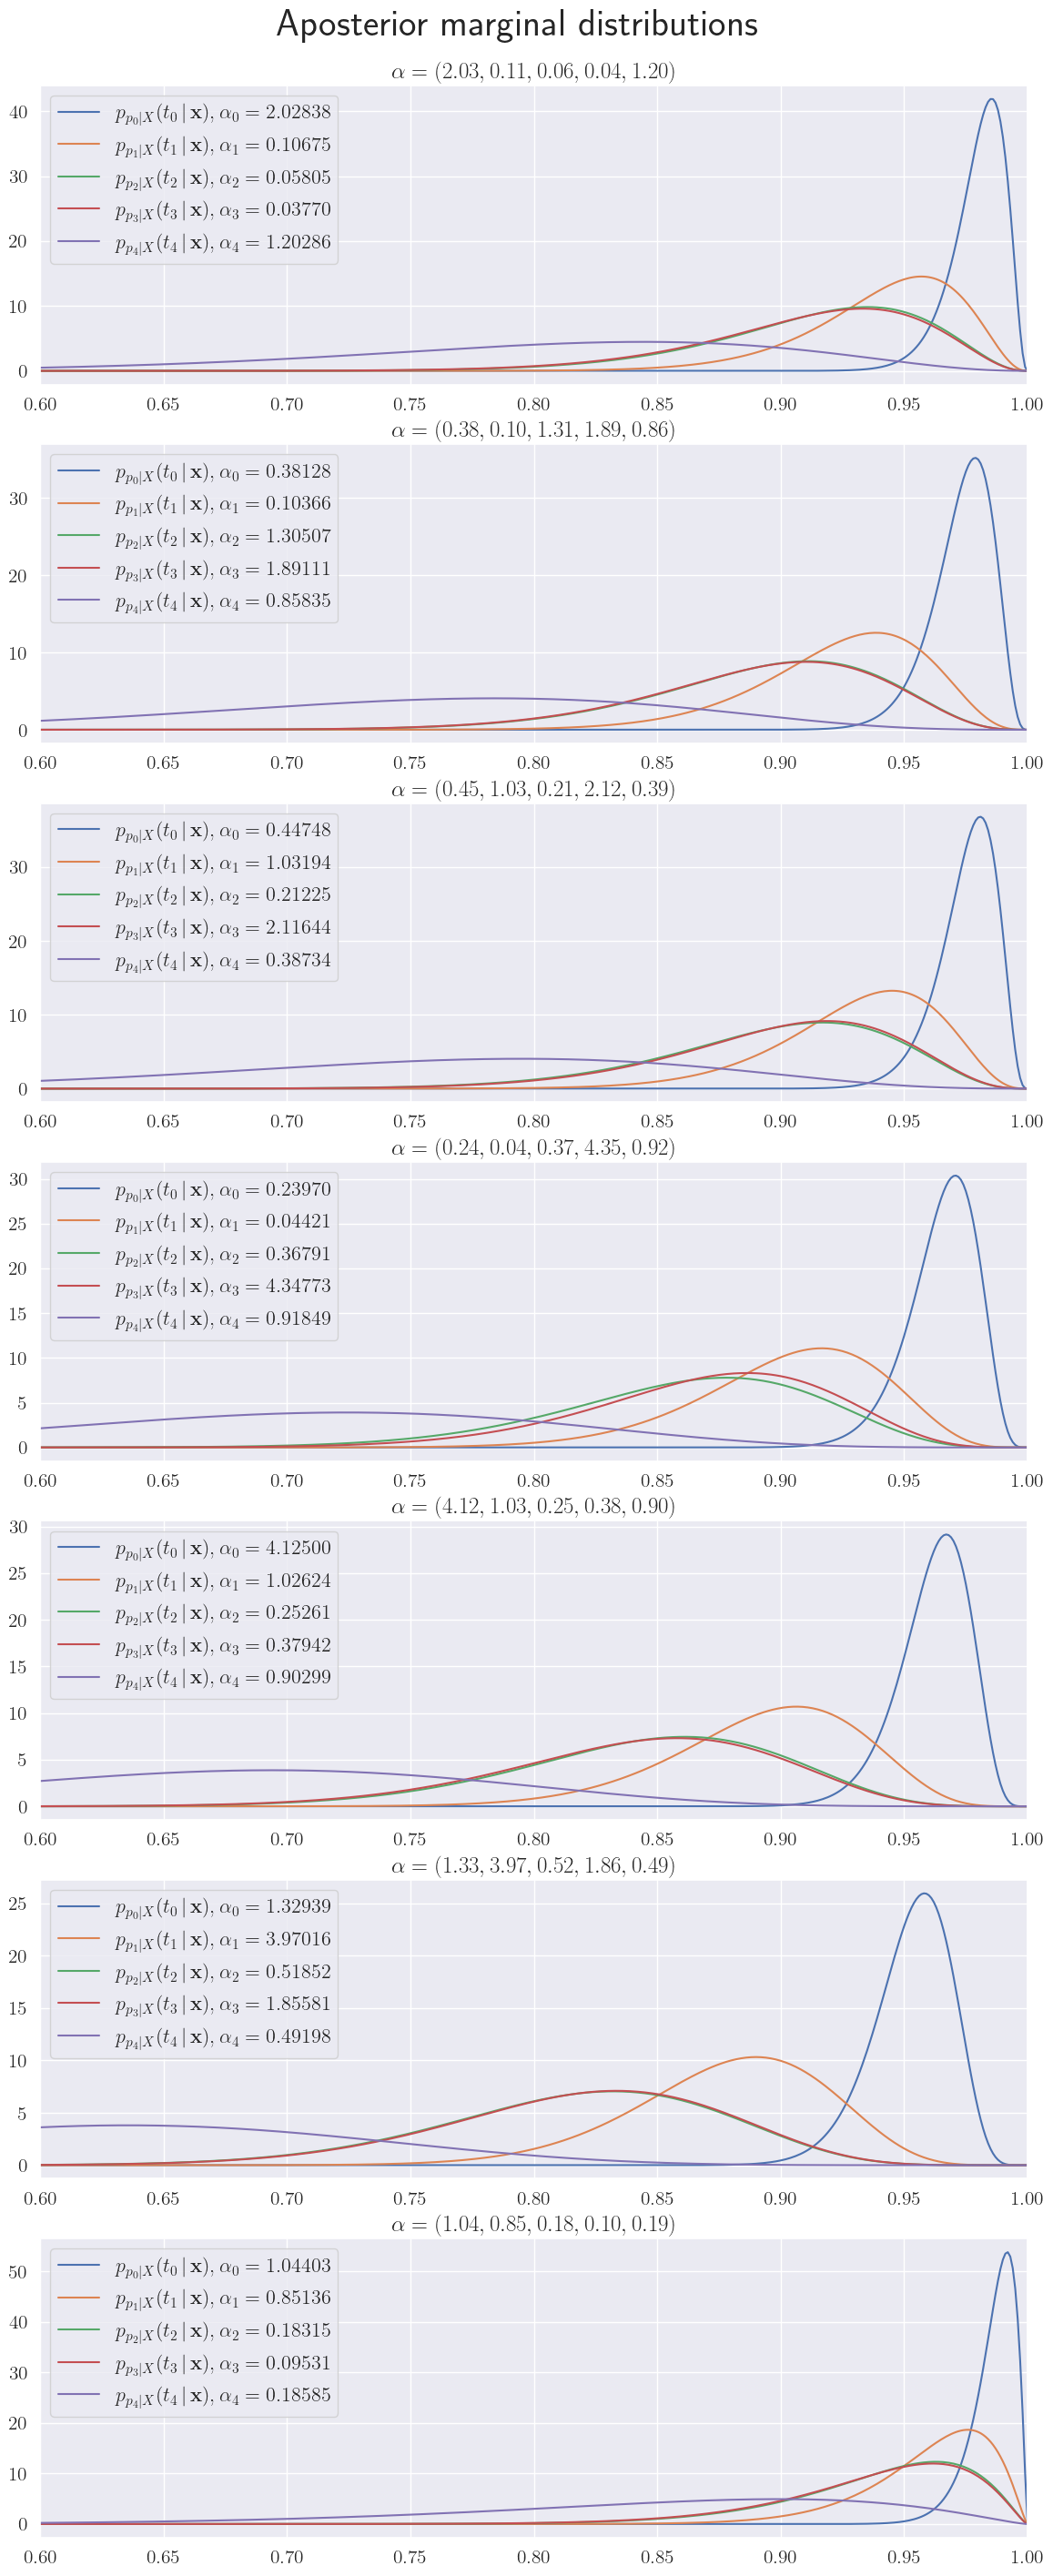

In [2834]:
num_of_alphas = 7
alpha = sps.expon.rvs(size=(num_of_alphas, 5))
grid = np.linspace(0, 1, 1001)

fig, axs = plt.subplots(num_of_alphas, figsize=(14, 35))
fig.suptitle('Aposterior marginal distributions', y=0.904, fontsize=30)

for jdx, ax in np.ndenumerate(axs):
    ax.set_title(r'$\alpha = (%.2f, %.2f, %.2f, %.2f, %.2f)$' % tuple(alpha[jdx]), fontsize=18)
    alpha_zero = alpha[jdx].sum()
    for idx in np.arange(5):
        ax.plot(grid, sps.beta.pdf(grid, alpha[jdx, idx] + c[idx], alpha_zero), label=r'$p_{p_{%.d} | X}(t_{%.d}\,|\,\mathbf{x}), \alpha_{%.d} = %.5f$' % (idx, idx, idx, alpha[jdx, idx]))
    ax.legend(fontsize=16)
    ax.set_xlim(0.6, 1.0)

Что Вы бы брали точечной оценкой параметра исходя из апостериорного распределения? Почему? В качестве $p_i$ можно брать приближенно посчитанные взвешенные маргинальные матожидания (посчитать все и каждое делить на эту сумму), так как это будет хорошим приближением условного матожидания, которое теоретически является наилучшей оценкой в байесовском подходе.

4. Выбор модели.

Рассмотрим несколько моделей предсказания сердечных заболеваний. Модели будут очень простыми --- у нас будет разный параметр вероятности для разных групп пациентов. Предложите 4-5 разбиений пациентов на группы (по полу/возрасту/каким-то порогам на количество сахара или холестерина в крови) и рассмотрите модели, при которых параметры категориального распределения оказываются разными или одинаковыми для разных групп. Посмотрите на пример с семинара. Посчитайте обоснованность в каждом случае.

**Указание:** не считайте интеграл, так как обоснованностью будет произведение комбинаторных коэффициентов и бета-функций.

**Указание:** При сравнении обоснованности для модели, которая учитывает разбиение на группы с той, которая не учитывает, плотность всё равно следует факторизовать на группы, чтобы анализ был одинаковым.

Например, для сравнения модели "параметр зависит от возраста" и "параметр зависит от пола" необходимо разделить данные на 4 группы "молодые/старые мужчины/женщины". См. пример с семинара.

Предполагая возможнность модели "параметр зависит от пола" мы делаем неявное предположение, что данные для разных полов приходят из разных совокупностей, а значит их нельзя объединять в одну выборку. Осторожно формулируйте, в каких предположениях Вы сравниваете модели.

Сделаем следующую категоризацию:
* По возрасту: old (1) если age >= 50 и young (0) иначе
* По chol-levels: high (1) если chol >= 200 и low (0) иначе

In [2474]:
X_pd = heart_disease.data.features
X_pd1 = X_pd[['age', 'sex', 'chol', 'fbs']]
X_pd1.loc[(X_pd1['age'] >= 50), 'age'] = 1
X_pd1.loc[(X_pd1['age'] > 1) & (X_pd1['age'] < 50), 'age'] = 0
X_pd1.loc[(X_pd1['chol'] >= 200), 'chol'] = 1
X_pd1.loc[(X_pd1['chol'] > 1) & (X_pd1['chol'] < 200), 'chol'] = 0

data_pd = pd.concat([X_pd1, Y_pd], axis=1)
data_pd = data.sort_values(['age', 'sex', 'chol', 'fbs'], kind='stable')
print(data_pd.head(15))

     age  sex  chol  fbs  num
50     0    0     0    0    0
61     0    0     0    0    0
93     0    0     0    0    0
117    0    0     0    0    0
169    0    0     0    0    0
222    0    0     0    0    0
4      0    0     1    0    0
18     0    0     1    0    0
125    0    0     1    0    0
134    0    0     1    0    0
151    0    0     1    0    0
197    0    0     1    0    0
210    0    0     1    0    0
216    0    0     1    0    0
217    0    0     1    0    0


Если рассматривать самое общее распределение, в котором участвуют все параметры, будем иметь $2\cdot 2\cdot2\cdot 2 = 16$ различных групп. Каждое разбиение на группы будет задаваться вектором булов $(B_1, B_2, B_3, B_4),\, \quad B_i \in \{True, False\}$, где $\,True\,$, означает включение данной категории в рассмотрение на разделение и $\,False\,$ - невключение соответственно. Однако рассматривать каждое разбиение априори бессмысленно (в модели упорядоченных выборок!!!), поскольку рассматривая всевозможные модели на генеральном (самом общем) разбиении на группы мы уже на этапе задания модели (решение, влияет или не влияет значение той или иной категории на вероятность того или иного исхода). Поэтому рассматриваем самое общее распределение и все возможные модели на нём. Всего будем иметь $2^4$ моделей (каждую категорию можно либо учитывать либо не учитывать). Если мы взяли в рассмотрение $d$ категорий фичей $C_{i_1}, C_{i_2}, \ldots, C_{i_d}$,  то нужно рассматривать суперматрицу $M_{i_1 i_2 \ldots i_d}[j_1][j_2]\ldots[j_d]$ размера $2^d$, где каждый $j_k$ принимает значение 0 или 1, и каждый такой коэффициент равен непосредственному параметру $\mathbf{t}_{j_1 j_2 \ldots j_d}$ распределения $p_{X|\mathbf{p}_{j_1 j_2 \ldots j_d}}(num \, | \, C_{i_1}, \ldots, C_{i_d}\,, \, \mathbf{t}_{j_1 j_2 \ldots j_d}) = \prod_{l = 0}^{K - 1} (\mathbf{t}_{j_1 j_2 \ldots j_d})_l^{[num = l]}$ в предположении, что фича $C_{i_p}$-й категории равна $j_p$. Таким образом нам осталось проинтегрировать по всем $2^d$ группам их отдельные обоснованности и перемножить их, поскольку все измерения независимы: $$ $$

$$p_{i_1 i_2 \ldots i_d}(Y \, | \, X) = \prod_{j_1 = 0, \ldots, j_d = 0}^{1} \int p_{X|\mathbf{p}_{j_1 j_2 \ldots j_d}}(Y \, | \, C_{i_1}, \ldots, C_{i_d}\,, \, \mathbf{t}_{j_1 j_2 \ldots j_d})p_{\mathbf{p}_{j_1 j_2 \ldots j_d}}(\mathbf{t}_{j_1 j_2 \ldots j_d}) \, d\mathbf{t}_{j_1 j_2 \ldots j_d} = $$ $$= \prod_{j_1 = 0, \ldots, j_d = 0}^{1} \int \prod_{r\,:\, C_{i_1}[r] = j_1, \ldots, C_{i_d}[r] = j_d} p_{X|\mathbf{p}_{j_1 j_2 \ldots j_d}}(num[r] \, | \, C_{i_1}, \ldots, C_{i_d}\,, \, \mathbf{t}_{j_1 j_2 \ldots j_d})p_{\mathbf{p}_{j_1 j_2 \ldots j_d}}(\mathbf{t}_{j_1 j_2 \ldots j_d}) \, d\mathbf{t}_{j_1 j_2 \ldots j_d}= $$ $$= \prod_{j_1 = 0, \ldots, j_d = 0}^{1} \int \prod_{r\,:\, C_{i_1}[r] = j_1, \ldots, C_{i_d}[r] = j_d} \prod_{l = 0}^{K - 1} (\mathbf{t}_{j_1 j_2 \ldots j_d})_l^{[num[r] = l]} \frac{1}{B(\pmb{\alpha})}\prod_{m = 0}^{K - 1}\,(\mathbf{t}_{j_1 j_2 \ldots j_d})_m^{\alpha_m - 1} d(\mathbf{t}_{j_1 j_2 \ldots j_d})_0 \, \ldots \, d(\mathbf{t}_{j_1 j_2 \ldots j_d})_{K - 1}$$

Пусть при рассмотрении категорий $C_{i_1}, C_{i_2}, \ldots, C_{i_d}$ имеем $n_{i_1\ldots i_d, j_1\ldots j_d}^l$ индексов выборки $r$ таких что ${r\,:\, C_{i_1}[r] = j_1, \ldots, C_{i_d}[r] = j_d}, \; num[r] = l$, тогда формула перепишется как 
$$\prod_{j_1 = 0, \ldots, j_d = 0}^{1} \int \frac{1}{B(\pmb{\alpha})} \prod_{l=0}^{K - 1}(\mathbf{t}_{j_1 j_2 \ldots j_d})_l^{n_{i_1\ldots i_d, j_1\ldots j_d}^l + \alpha_l - 1} d(\mathbf{t}_{j_1 j_2 \ldots j_d})_0 \, \ldots \, d(\mathbf{t}_{j_1 j_2 \ldots j_d})_{K - 1} = $$ $$ = \prod_{j_1 = 0, \ldots, j_d = 0}^{1} \frac{B(\pmb{\alpha} + \mathbf{n}_{i_1\ldots i_d, j_1\ldots j_d})}{B(\pmb{\alpha})}, \quad \text{где} \,\, \mathbf{n}_{i_1\ldots i_d, j_1\ldots j_d} = (n_{i_1\ldots i_d, j_1\ldots j_d}^0, \ldots, n_{i_1\ldots i_d, j_1\ldots j_d}^{K-1})$$

Коэффициенты $n_{i_1\ldots i_d, j_1\ldots j_d}^l$ будем непосредственно находить из выборки 

In [2597]:
from itertools import combinations, product

def sub_lists(my_list):
    subs = []
    for i in range(0, len(my_list) + 1):
        temp = [list(x) for x in combinations(my_list, i)]
        if len(temp) > 0:
            subs.extend(temp)
    return subs

def ones_zeros(length):
    arr = []
    for numbers in product([0, 1], repeat=length):
        arr.append(numbers)
    return arr

ones_zeros(0)

[()]

In [2720]:
from scipy.special import loggamma

def log_multivar_beta(a: np.array):
    return (loggamma(a)).sum() - loggamma(a.sum())

print(log_multivar_beta(np.array([150.0, 15.0])))

-50.64678230167078


In [2722]:
def gett(data, choice, vals, k):
    """
    choice: list [i_1, i_2, ..., i_d];
    vals: list [j_1, j_2, ..., j_d], each either 0 or 1;
    returns: list(len = k) of counts [num==l n_{i_d, ...,i_d, j_1, ..., j_d}^l for l in range(k)];
    """
    convert = ['age', 'sex', 'chol', 'fbs', 'num']
    counts = np.full(k, 0)
    d = len(choice)
    data_new = data
    for m in range(d):
        data_new = data_new[data_new[convert[choice[m]]] == vals[m]]
    nums = (data_new[convert[k - 1]]).to_numpy()
    for x in range(k):
        counts[x] = np.count_nonzero(nums == x)
    return counts

print(gett(data_pd, [], (), 5))
print(gett(data_pd, [0], (0, 1), 5))
print(gett(data_pd, [2, 3], (1, 1), 5))

[164  55  36  35  13]
[61 13  5  7  1]
[18  4  8  7  1]


In [2724]:
cat_num = 4
cats_choices = np.arange(cat_num)
print(sub_lists(cats_choices))
convert_global = np.array(['age', 'sex', 'chol', 'fbs', 'num'])


[[], [0], [1], [2], [3], [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3], [0, 1, 2, 3]]


In [2739]:
alpha = np.array([10, 5, 5, 5, 5])

for choice_of_cls in sub_lists(cats_choices):
    evidence = 0.0
    d = len(choice_of_cls)
    variations = ones_zeros(d)
    for variation in variations:
        #print(evidence)
        #print(gett(data_pd, choice_of_cls, variation, 5))
        #print(gett(data_pd, choice_of_cls, variation, 5) + alpha)
        evidence += log_multivar_beta(gett(data_pd, choice_of_cls, variation, 5) + alpha) - log_multivar_beta(alpha)
    print('Categories considered: ', convert_global[choice_of_cls], ' log(evidence): %.6f' % (evidence, ))


Categories considered:  []  log(evidence): -396.376756
Categories considered:  ['age']  log(evidence): -397.599971
Categories considered:  ['sex']  log(evidence): -393.327385
Categories considered:  ['chol']  log(evidence): -400.374799
Categories considered:  ['fbs']  log(evidence): -397.413997
Categories considered:  ['age' 'sex']  log(evidence): -398.318088
Categories considered:  ['age' 'chol']  log(evidence): -402.561731
Categories considered:  ['age' 'fbs']  log(evidence): -398.898137
Categories considered:  ['sex' 'chol']  log(evidence): -399.847437
Categories considered:  ['sex' 'fbs']  log(evidence): -394.306776
Categories considered:  ['chol' 'fbs']  log(evidence): -402.166966
Categories considered:  ['age' 'sex' 'chol']  log(evidence): -404.630345
Categories considered:  ['age' 'sex' 'fbs']  log(evidence): -399.607572
Categories considered:  ['age' 'chol' 'fbs']  log(evidence): -404.080548
Categories considered:  ['sex' 'chol' 'fbs']  log(evidence): -401.236703
Categories con

У какой модели выше обоснованность? *Самая высокая обоснованность у модели, берущей во внимание только пол пациента*. Почему? *Очень легко задаётся, мало за чем следить нужно. Однако лучше брать модель с чуть большим числом параметров, 2 например, следующая такая по счету идет модель, делающая предсказания на основе пола и уровня сахара в крови.*

Сделайте вывод о байесовском оценивании: *Круто (смотри для справки выкладки выше).*